# Importing Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
plt.style.use("fivethirtyeight")
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from pandas.tseries.offsets import BDay

# Importing CSV Files

In [2]:
# E-Commerce
SHOP = pd.read_csv('./Data_II/E-Commerce/SHOP.csv')
ETSY = pd.read_csv('./Data_II/E-Commerce/ETSY.csv')
WIX = pd.read_csv('./Data_II/E-Commerce/WIX.csv')
GDDY = pd.read_csv('./Data_II/E-Commerce/GDDY.csv')

# Food
KR = pd.read_csv('./Data_II/Food/KR.csv')
MCD = pd.read_csv('./Data_II/Food/MCD.csv')
CMG = pd.read_csv('./Data_II/Food/CMG.csv')
SBUX = pd.read_csv('./Data_II/Food/SBUX.csv')

# Retail
BBY = pd.read_csv('./Data_II/Retail/BBY.csv')
HD = pd.read_csv('./Data_II/Retail/HD.csv')
WMT = pd.read_csv('./Data_II/Retail/WMT.csv')
TGT = pd.read_csv('./Data_II/Retail/TGT.csv')

# Finance
C = pd.read_csv('./Data_II/Finance/C.csv')
GDOT = pd.read_csv('./Data_II/Finance/GDOT.csv')
JPM = pd.read_csv('./Data_II/Finance/JPM.csv')
PYPL = pd.read_csv('./Data_II/Finance/PYPL.csv')

# S&P 500
SP500 = pd.read_csv('./Data_II/^GSPC.csv')

TGT.head()

Date       Open       High        Low      Close  Adj Close   Volume
0  2016-01-13  73.290001  73.750000  71.550003  71.639999  61.169975  5963500
1  2016-01-14  71.620003  71.639999  70.000000  70.410004  60.119747  6283200
2  2016-01-15  68.830002  70.589996  68.830002  70.080002  59.837971  7435800
3  2016-01-19  69.849998  70.559998  68.699997  69.239998  59.120720  5645400
4  2016-01-20  68.220001  68.620003  66.459999  67.589996  57.711868  9395700

# Merging all stocks to their respective industries

In [3]:
# E-Commerce
columns_to_keep = ['Date', 'Close', 'Volume']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
ETSY = ETSY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WIX = WIX[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDDY = GDDY[columns_to_keep]


# Food
columns_to_keep = ['Date', 'Close', 'Volume']
KR = KR[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
MCD = MCD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
CMG = CMG[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SBUX = SBUX[columns_to_keep]


# Retail
columns_to_keep = ['Date', 'Close', 'Volume']
BBY = BBY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
HD = HD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WMT = WMT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
TGT = TGT[columns_to_keep]


# Finance
columns_to_keep = ['Date', 'Close', 'Volume']
C = C[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDOT = GDOT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
JPM = JPM[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
PYPL = PYPL[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SP500 = SP500[columns_to_keep]

SBUX.head()

Date      Close    Volume
0  2016-01-13  57.869999  11303600
1  2016-01-14  58.980000  11444100
2  2016-01-15  58.000000  15246100
3  2016-01-19  58.549999  12289000
4  2016-01-20  56.919998  22786400

# Create one dataframe with ALL stocks including S&P 500

In [4]:
stock_close = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY']

stock_close = stock_close.merge(WIX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX']

stock_close = stock_close.merge(GDDY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']

stock_close = stock_close.merge(KR[['Date','Close']])
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR']

stock_close = stock_close.merge(MCD[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD']

stock_close = stock_close.merge(CMG[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG']

stock_close = stock_close.merge(SBUX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX']

stock_close = stock_close.merge(BBY[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY']

stock_close = stock_close.merge(HD[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD']

stock_close = stock_close.merge(TGT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT']

stock_close = stock_close.merge(WMT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT']

stock_close = stock_close.merge(C[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C']

stock_close = stock_close.merge(JPM[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM']

stock_close = stock_close.merge(PYPL[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL']

stock_close = stock_close.merge(GDOT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL', 'GDOT']

stock_close = stock_close.merge(SP500[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL', 'GDOT', 'SP500']

stock_close.to_excel('stock_close.xlsx', index=True)
stock_close.head()


Date       SHOP  ETSY        WIX       GDDY         KR         MCD  \
0  2016-01-13  21.379999  6.99  20.760000  29.549999  39.200001  115.120003   
1  2016-01-14  20.639999  7.07  21.150000  29.559999  39.029999  116.620003   
2  2016-01-15  19.889999  7.00  21.040001  29.170000  38.490002  115.180000   
3  2016-01-19  20.299999  6.65  20.170000  28.340000  38.189999  117.500000   
4  2016-01-20  20.530001  6.88  19.969999  28.230000  37.849998  115.779999   

          CMG       SBUX        BBY          HD        TGT        WMT  \
0  428.279999  57.869999  29.260000  121.400002  71.639999  61.919998   
1  454.299988  58.980000  26.430000  119.620003  70.410004  63.060001   
2  475.940002  58.000000  27.110001  119.230003  70.080002  61.930000   
3  469.470001  58.549999  25.870001  119.760002  69.239998  62.560001   
4  465.500000  56.919998  26.530001  116.459999  67.589996  60.840000   

           C        JPM       PYPL   GDOT        SP500  
0  45.189999  57.340000  32.119999  15.43  1890.280029  
1  45.380001  58.200001  32.869999  15.80  1921.839966  
2  42.470001  57.040001  32.310001  15.87  1880.329956  
3  41.939999  57.009998  32.200001  15.65  1881.329956  
4  40.490002  55.509998  31.200001  16.42  1859.329956

# Line Chart Comparison

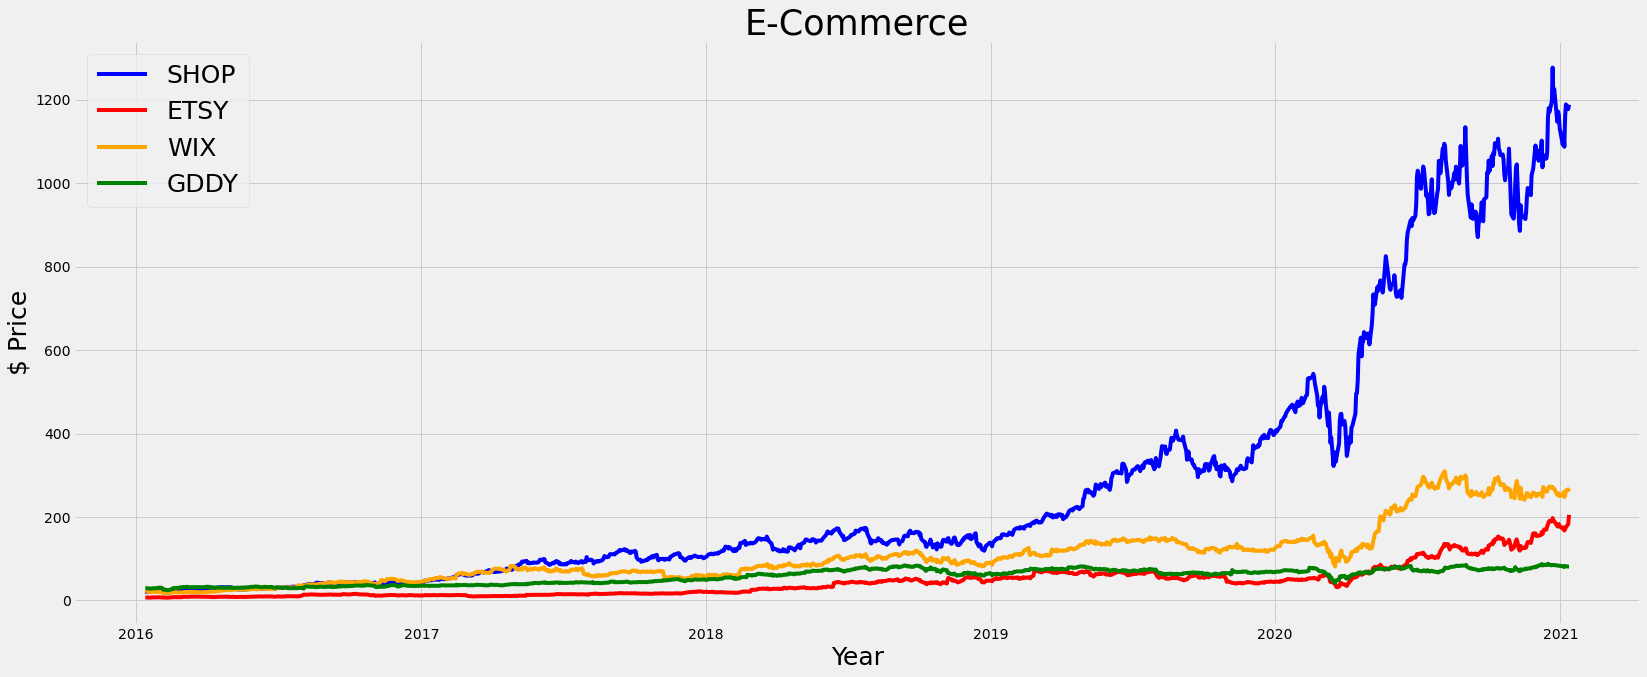

In [5]:
mpl.rcParams['figure.figsize']=(25,10)
stock_close['Date']=pd.to_datetime(stock_close['Date'])
stock_close.set_index('Date',inplace=True)
plt.plot('SHOP', color='blue', data=stock_close, label='SHOP')
plt.plot('ETSY', color='red', data=stock_close, label='ETSY')
plt.plot('WIX', color='orange', data=stock_close, label='WIX')
plt.plot('GDDY', color='green', data=stock_close, label='GDDY')
plt.legend(loc='upper left', fontsize='25')
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('E-Commerce', fontsize=35)
# plt.figure(figsize=(20,20))
plt.show()

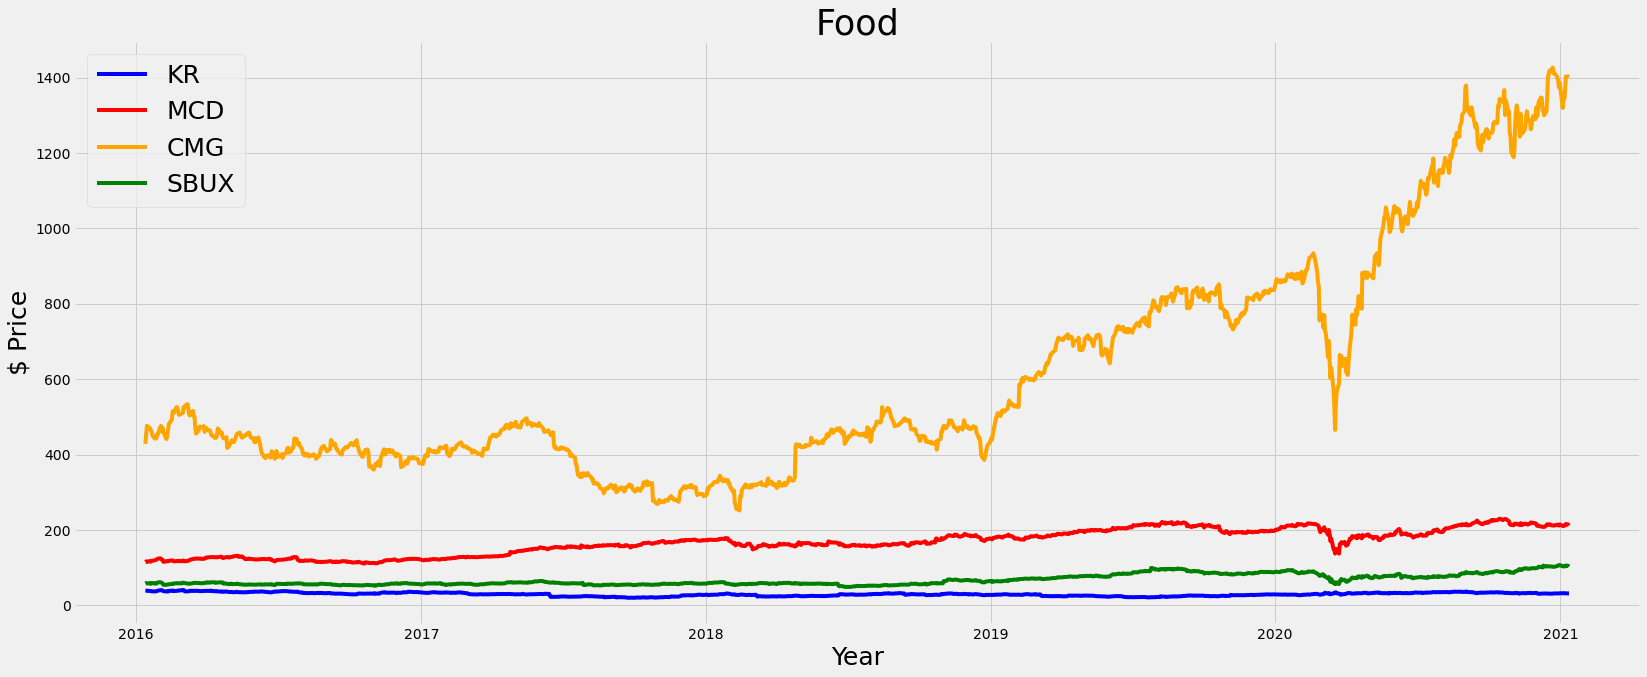

In [6]:
plt.plot('KR', color='blue', data=stock_close, label='KR')
plt.plot('MCD', color='red', data=stock_close, label='MCD')
plt.plot('CMG', color='orange', data=stock_close, label='CMG')
plt.plot('SBUX', color='green', data=stock_close, label='SBUX')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Food', fontsize=35)
plt.show()

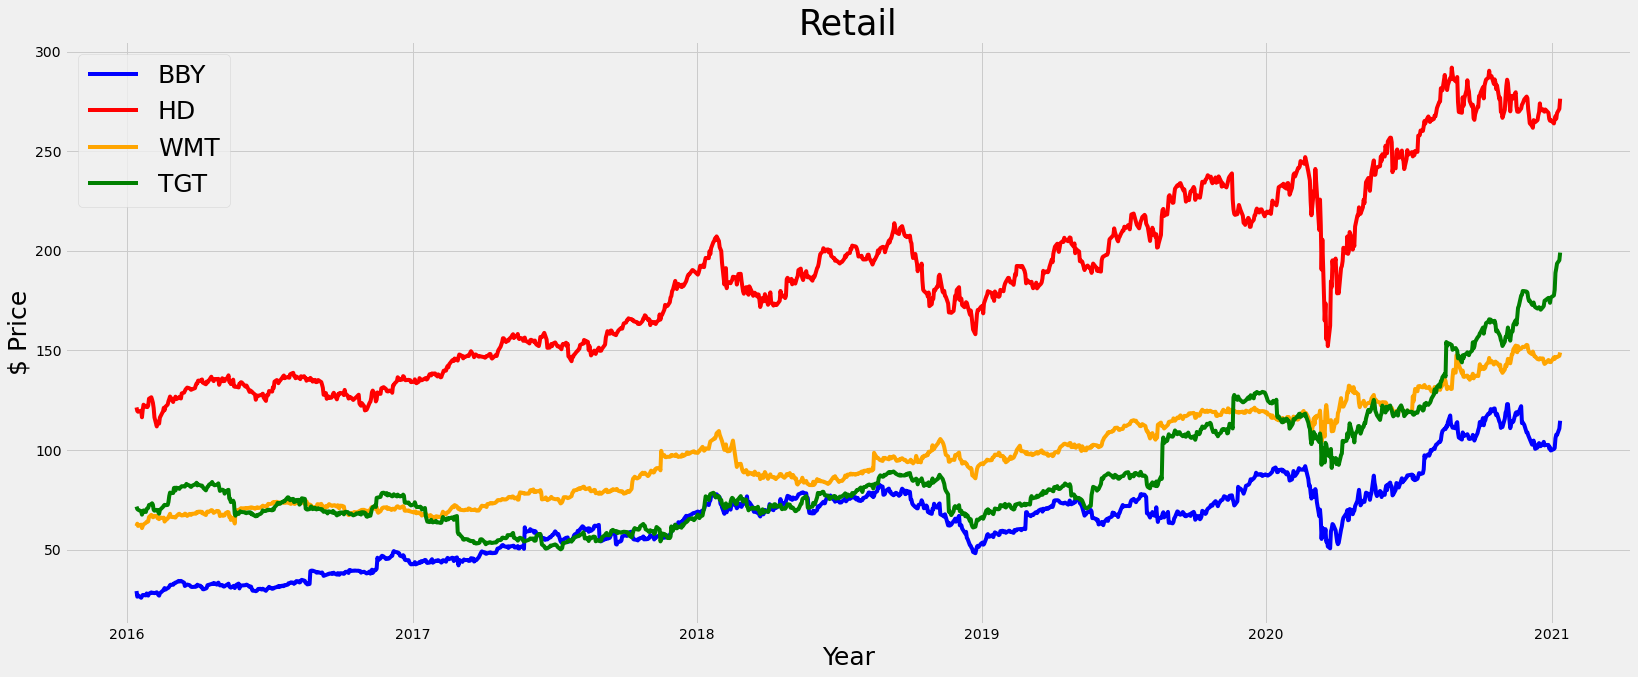

In [7]:
plt.plot('BBY', color='blue', data=stock_close, label='BBY')
plt.plot('HD', color='red', data=stock_close, label='HD')
plt.plot('WMT', color='orange', data=stock_close, label='WMT')
plt.plot('TGT', color='green', data=stock_close, label='TGT')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Retail', fontsize=35)
plt.show()

In [8]:
plt.plot('C', color='blue', data=stock_close, label='C')
plt.plot('GDOT', color='red', data=stock_close, label='GDOT')
plt.plot('JPM', color='orange', data=stock_close, label='JPM')
plt.plot('PYPL', color='green', data=stock_close, label='PYPL')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Finance', fontsize=35)
plt.show()

# Stock Performance VS S&P 500

In [9]:
listOfVariables = stock_close.drop(['SP500'], axis=1).columns
print(listOfVariables)

Index(['SHOP', 'ETSY', 'WIX', 'GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD',
       'TGT', 'WMT', 'C', 'JPM', 'PYPL', 'GDOT'],
      dtype='object')


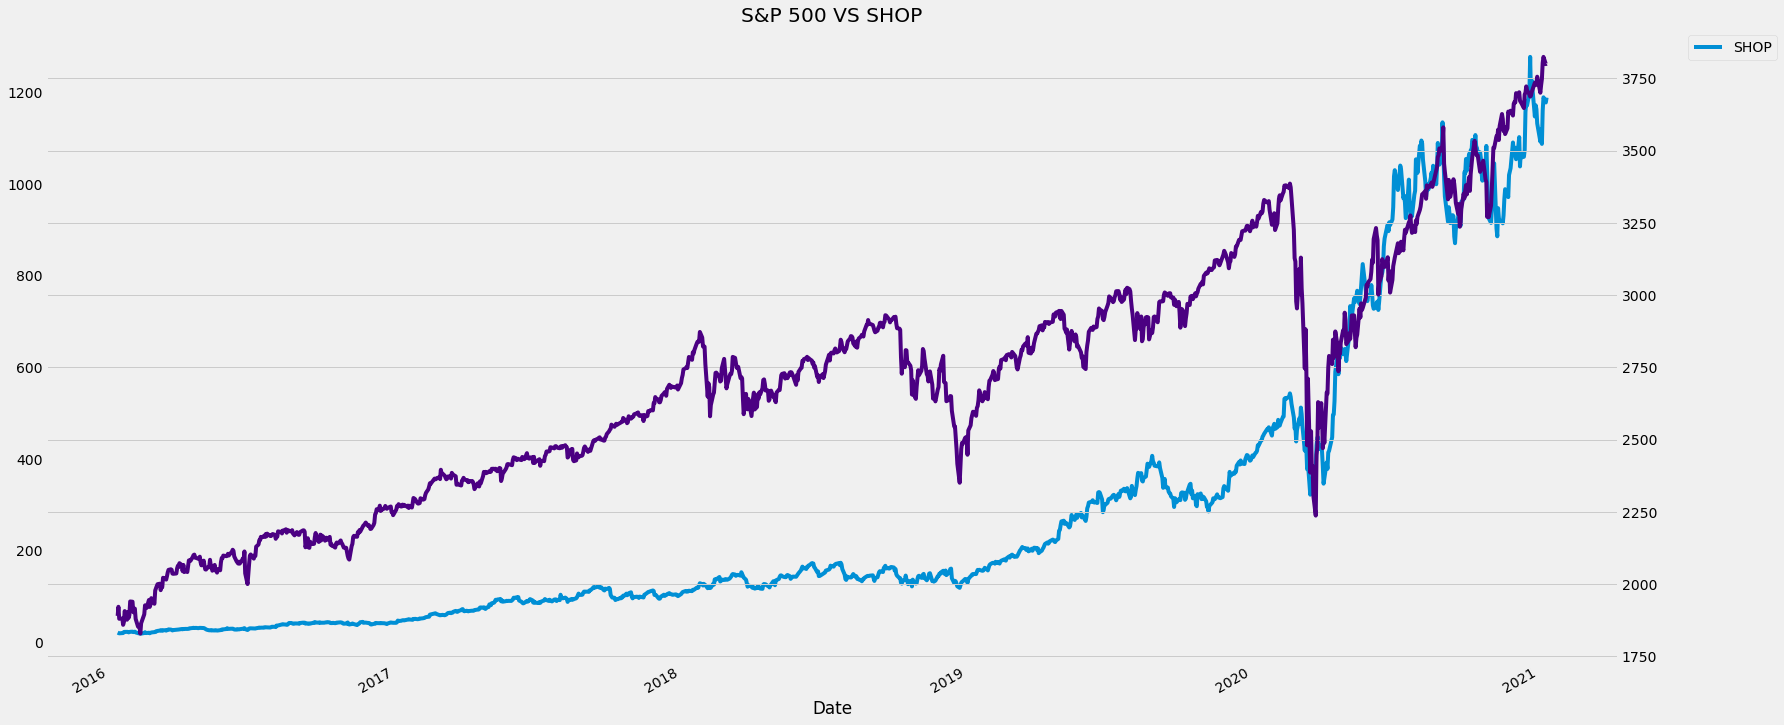

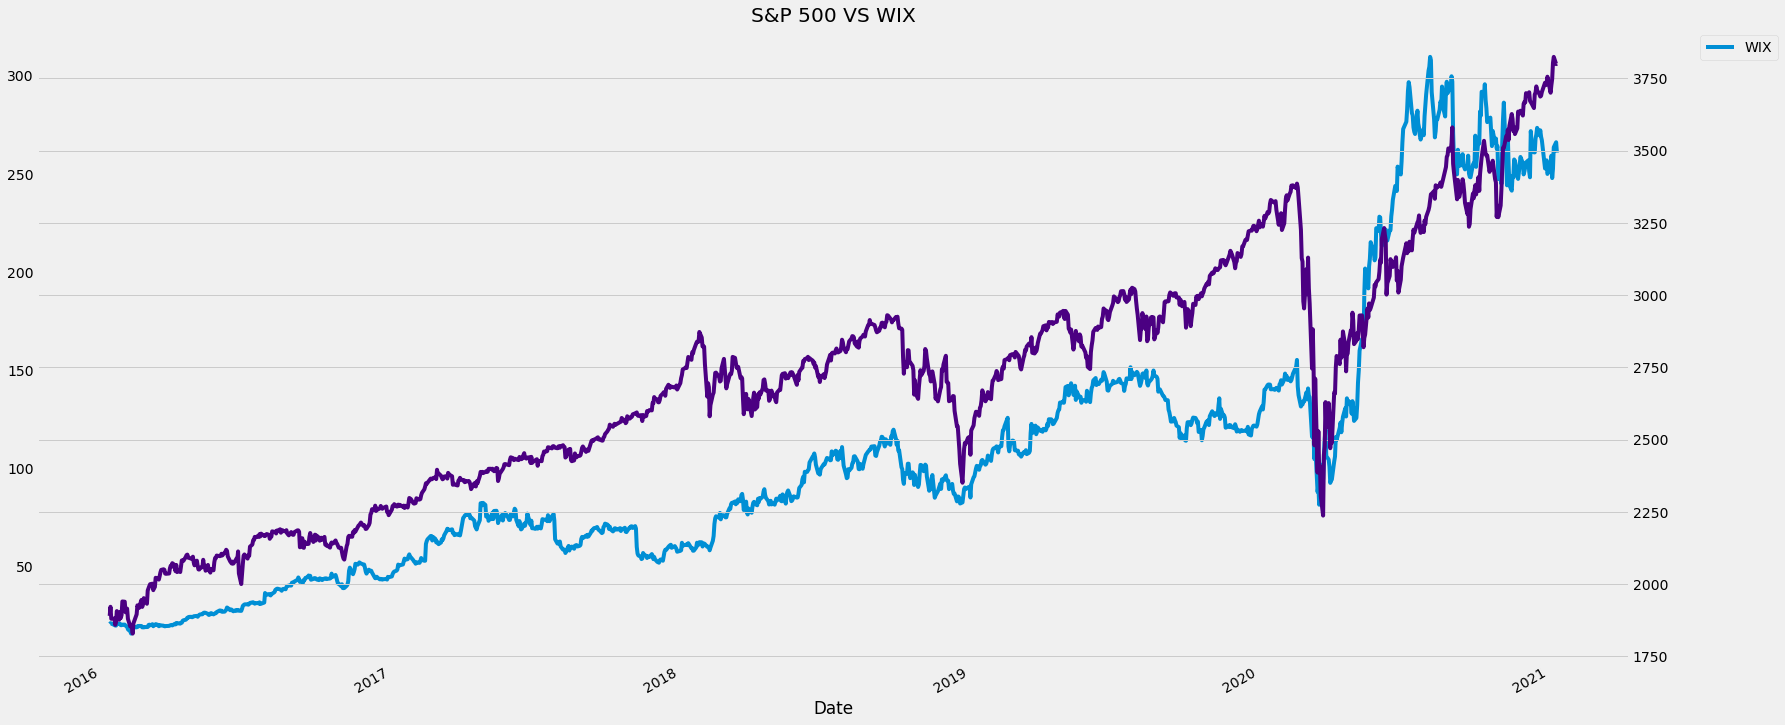

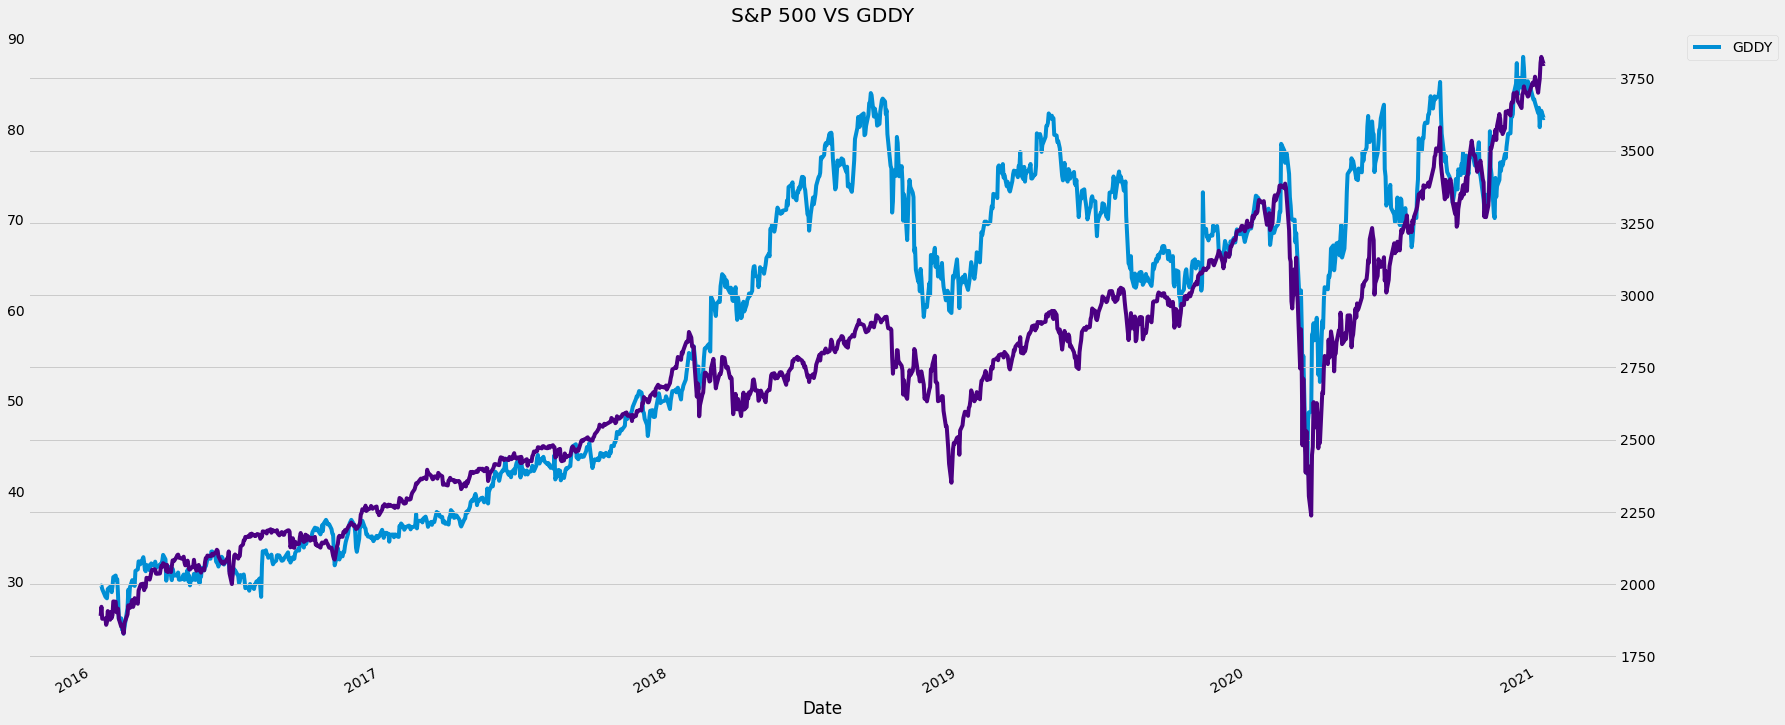

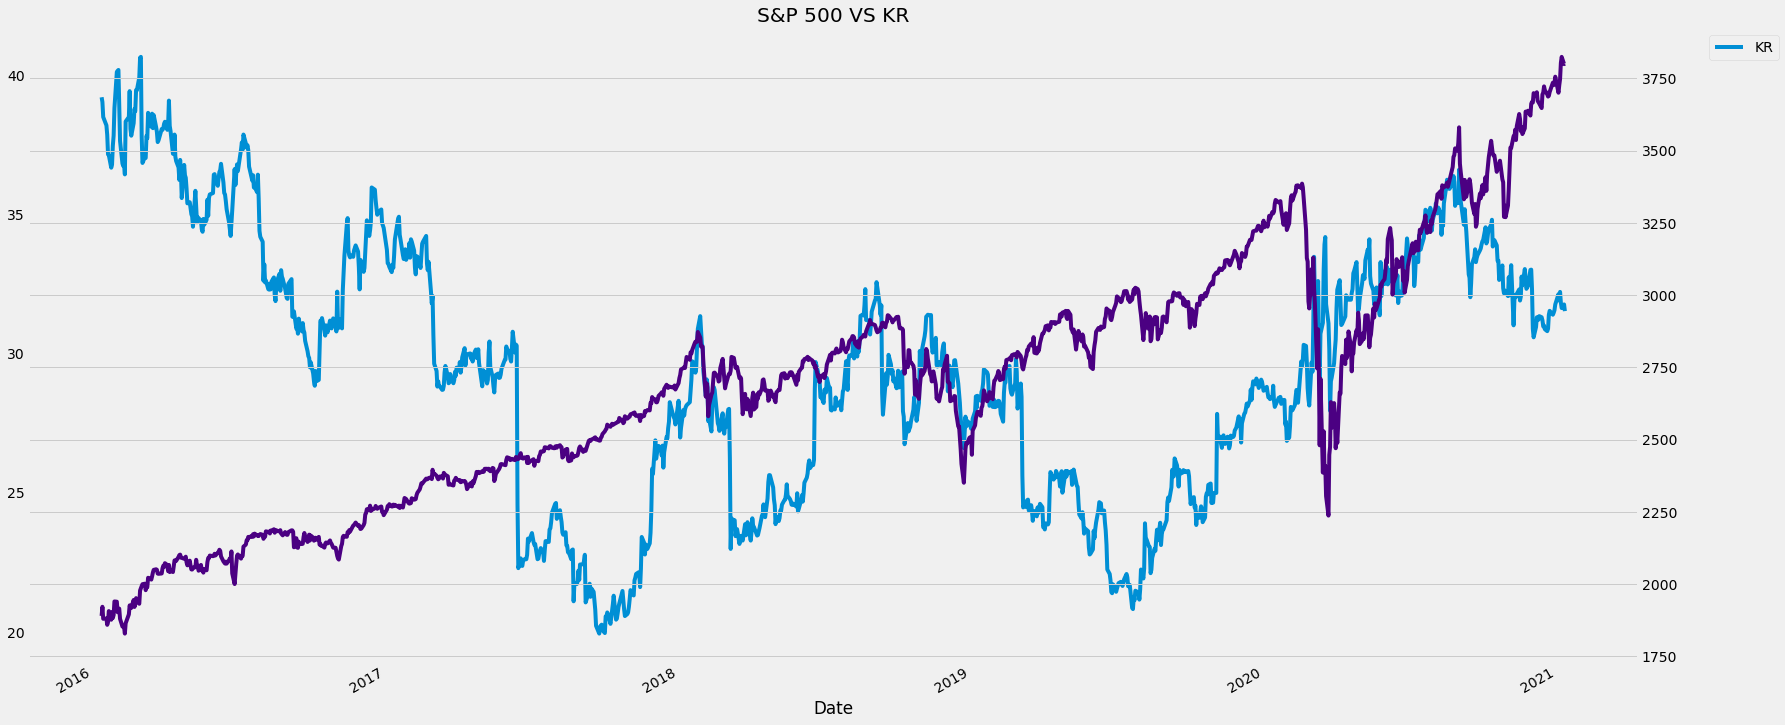

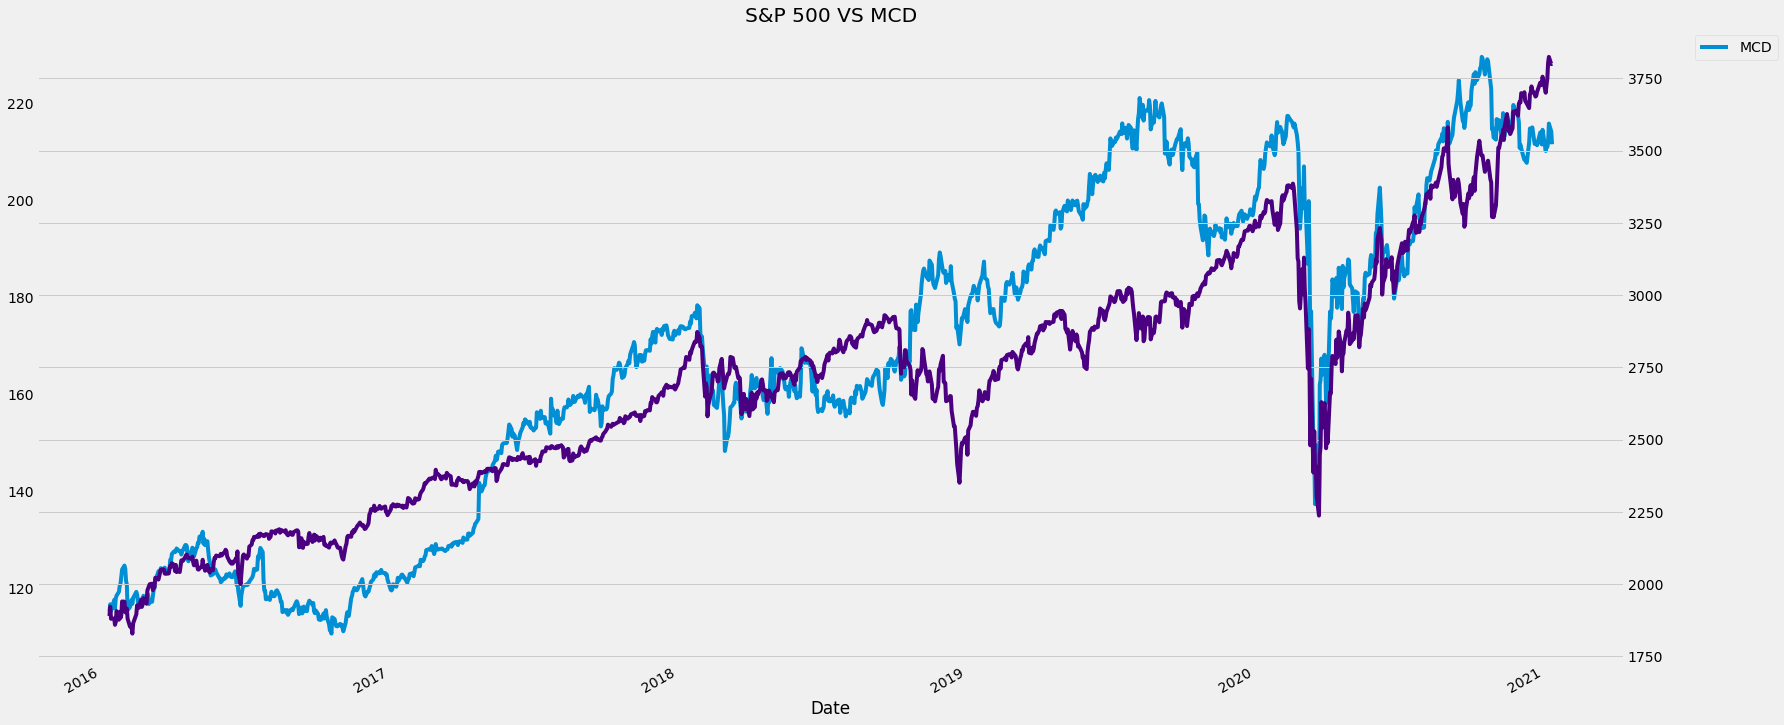

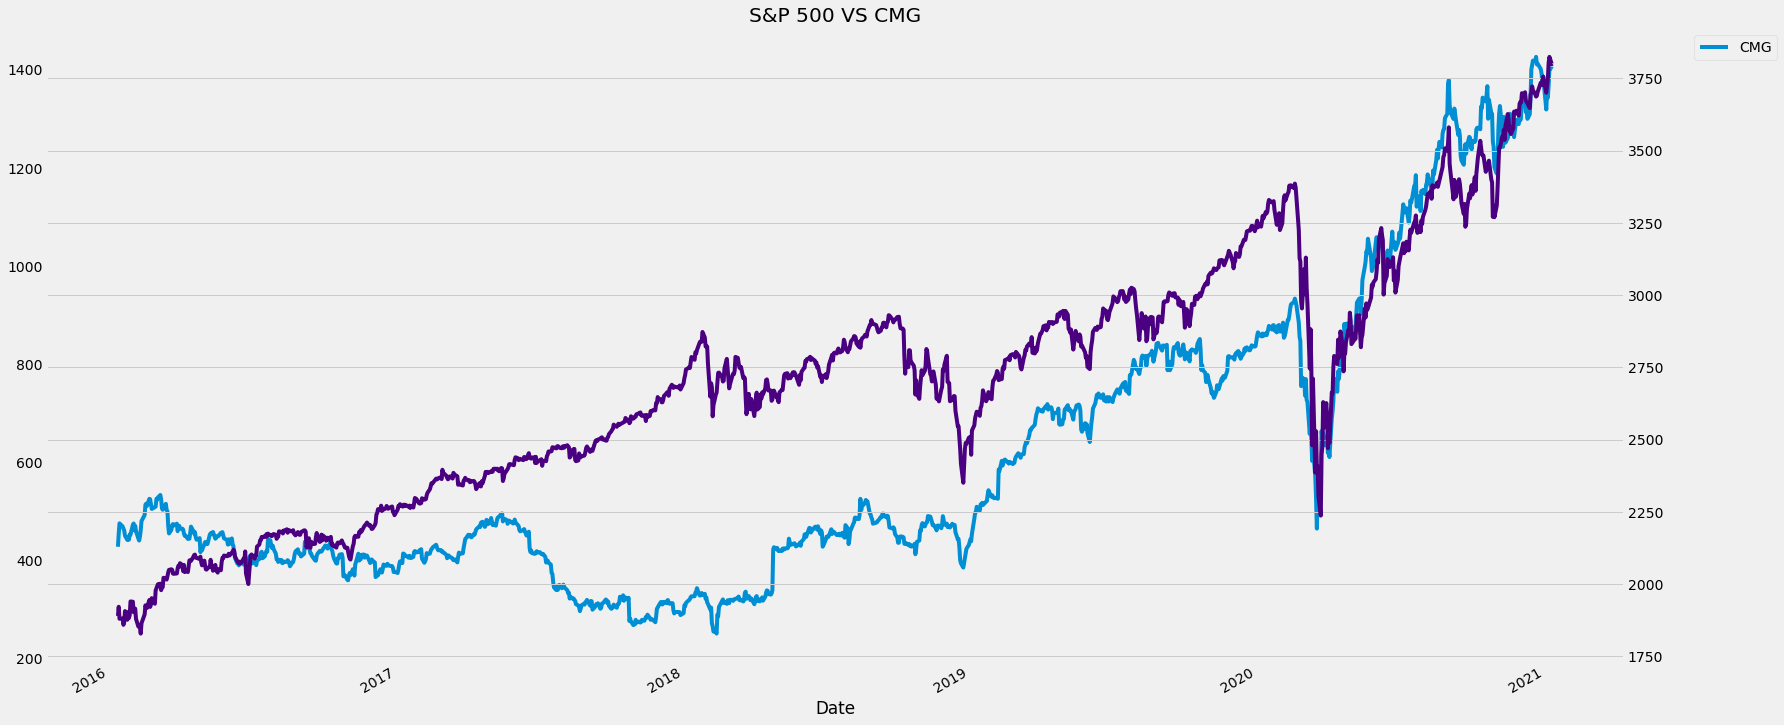

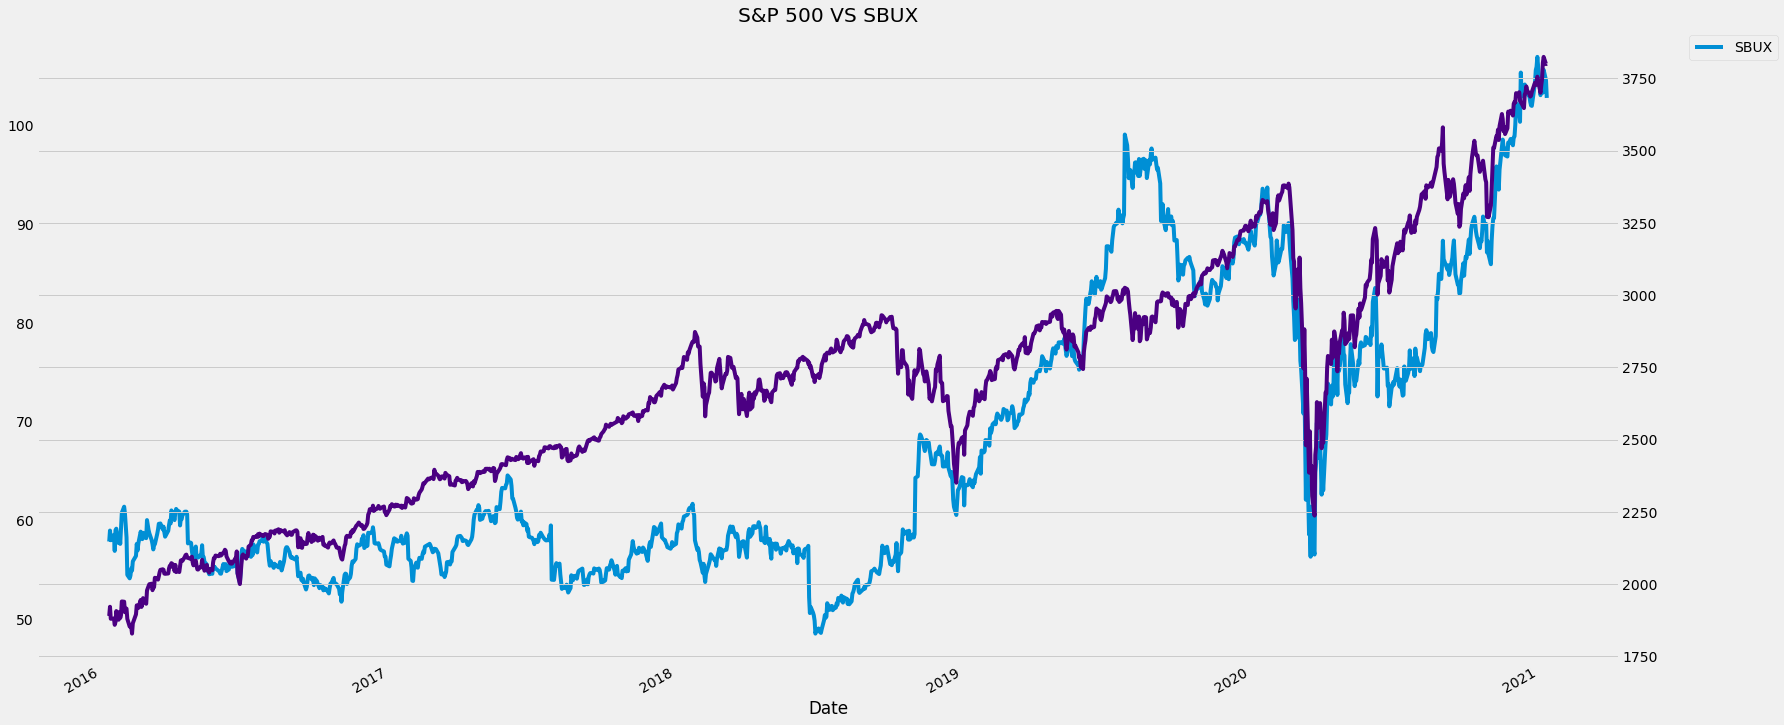

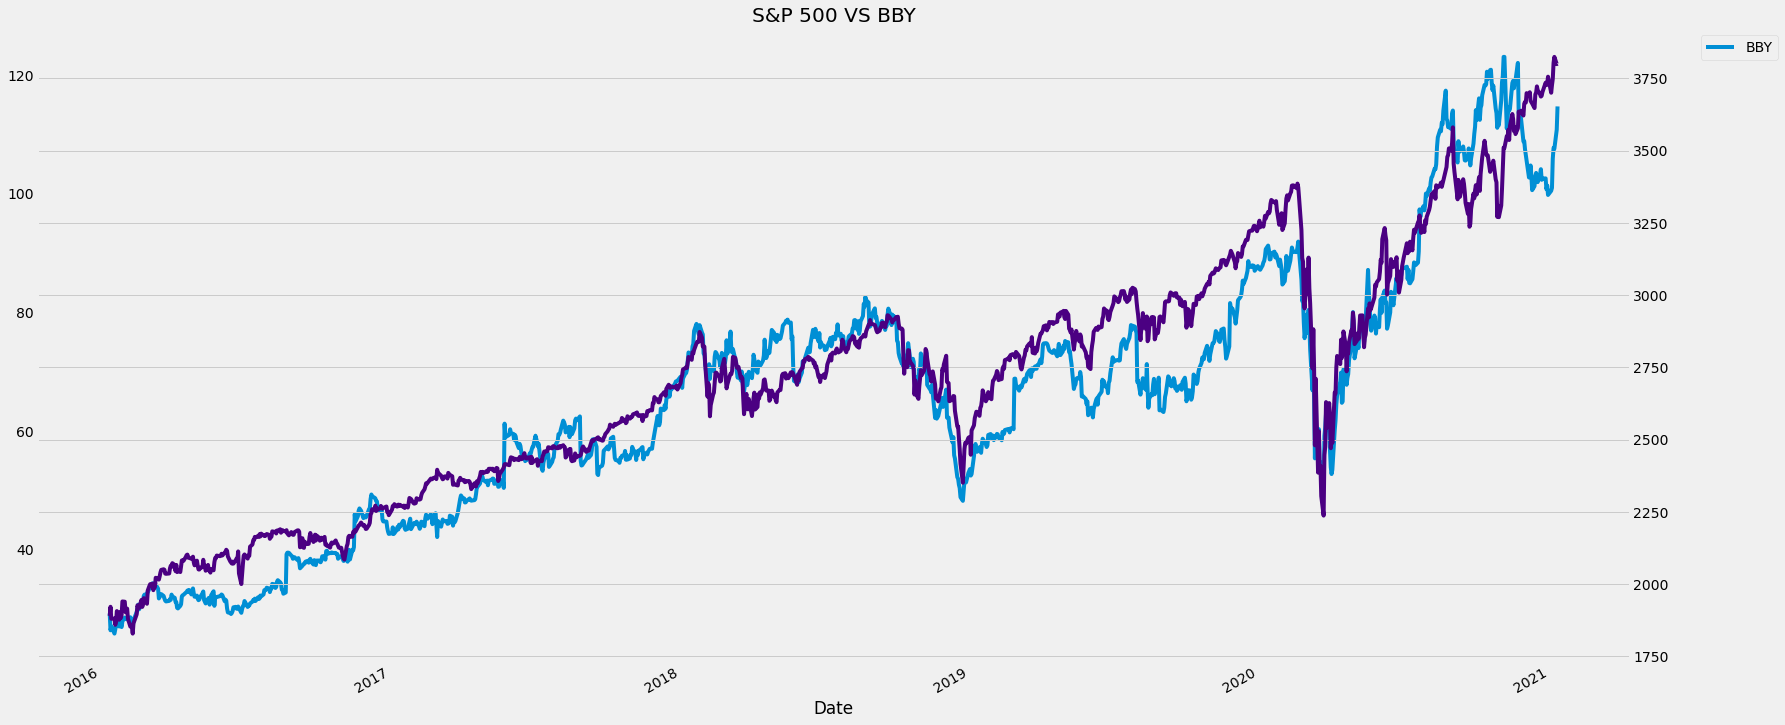

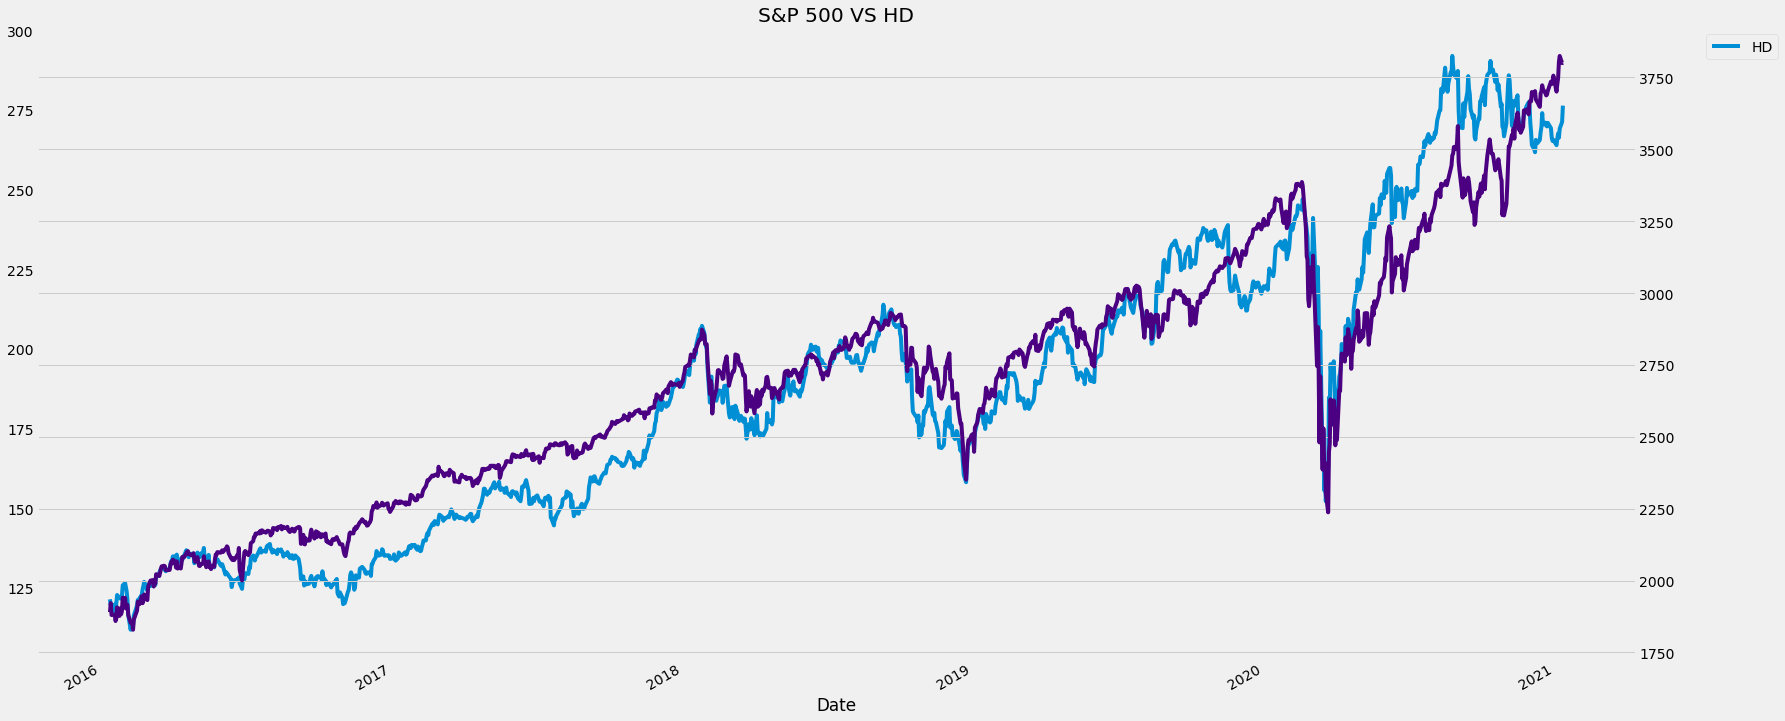

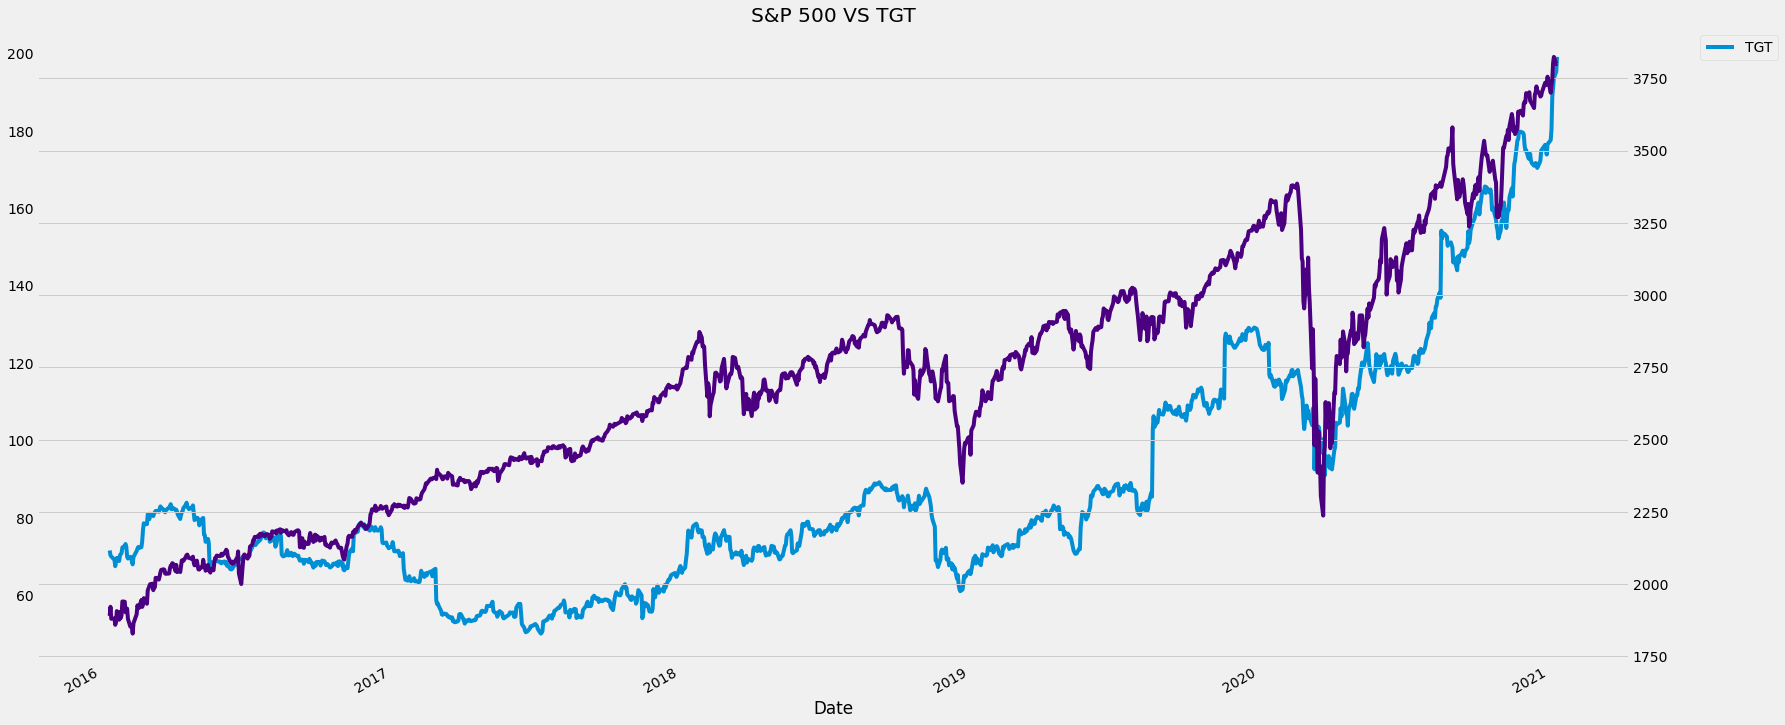

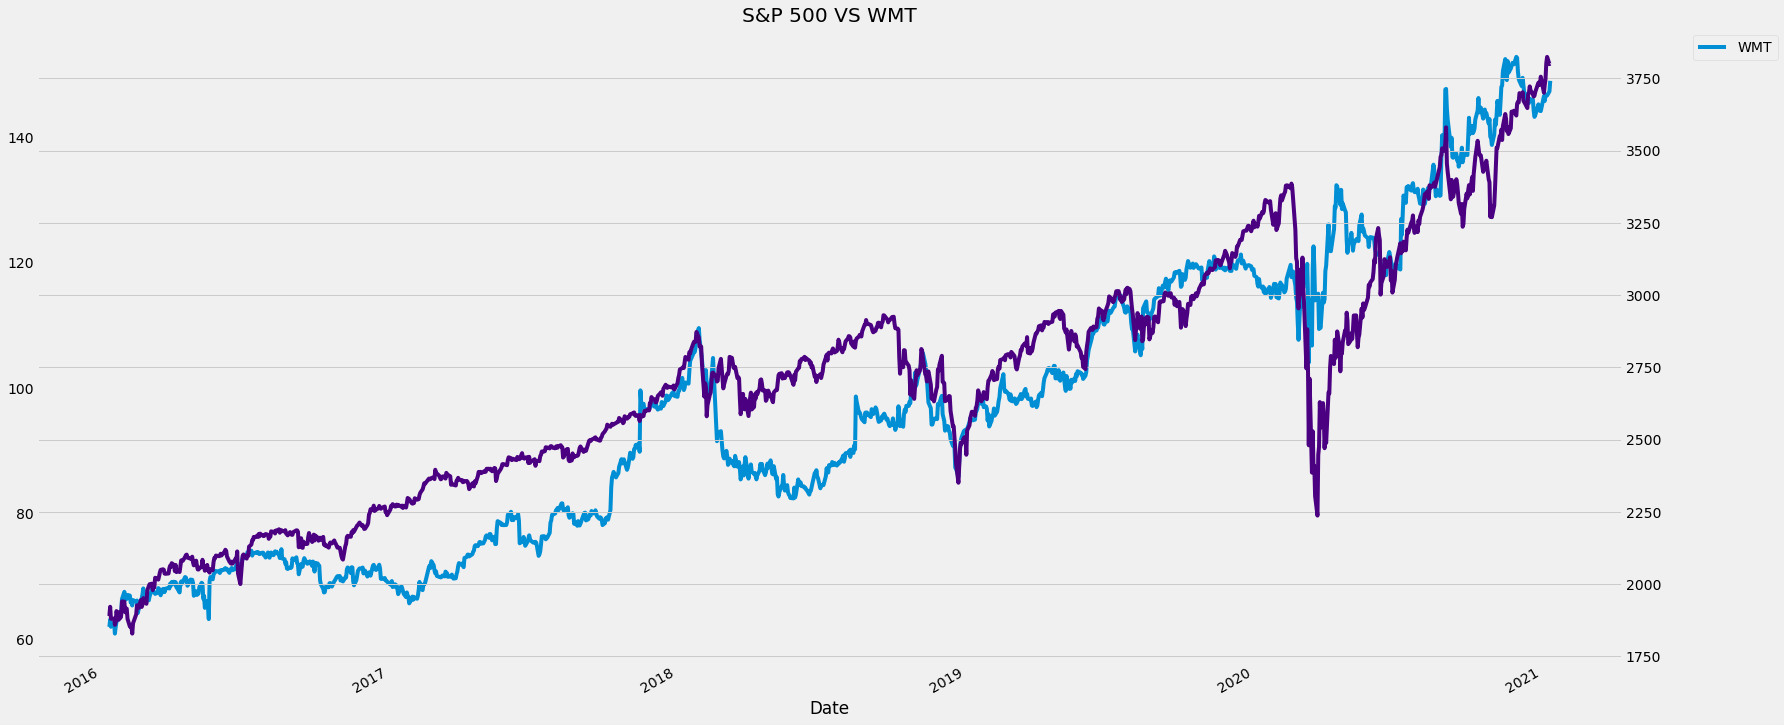

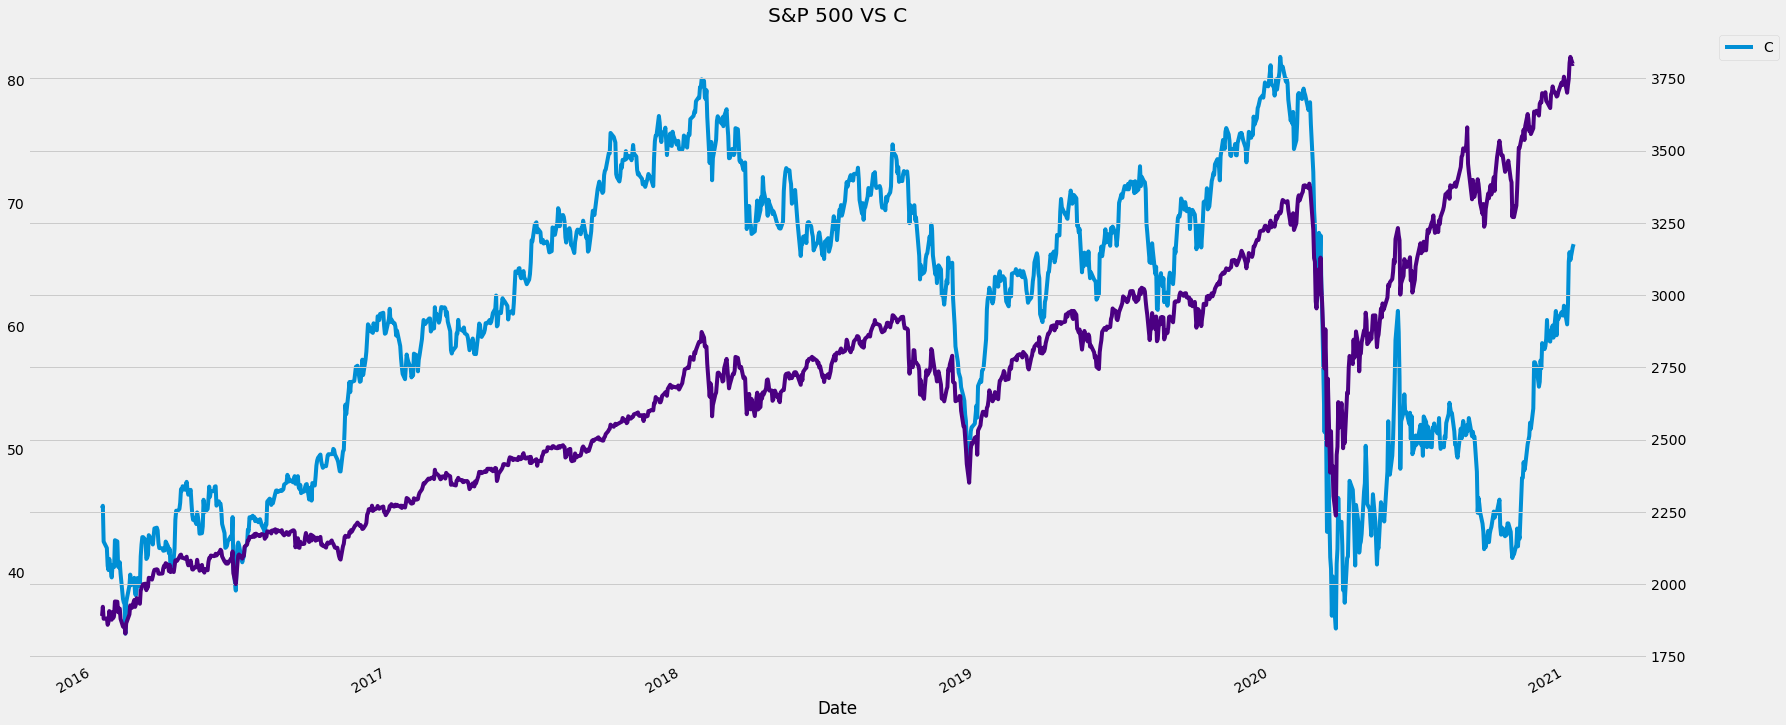

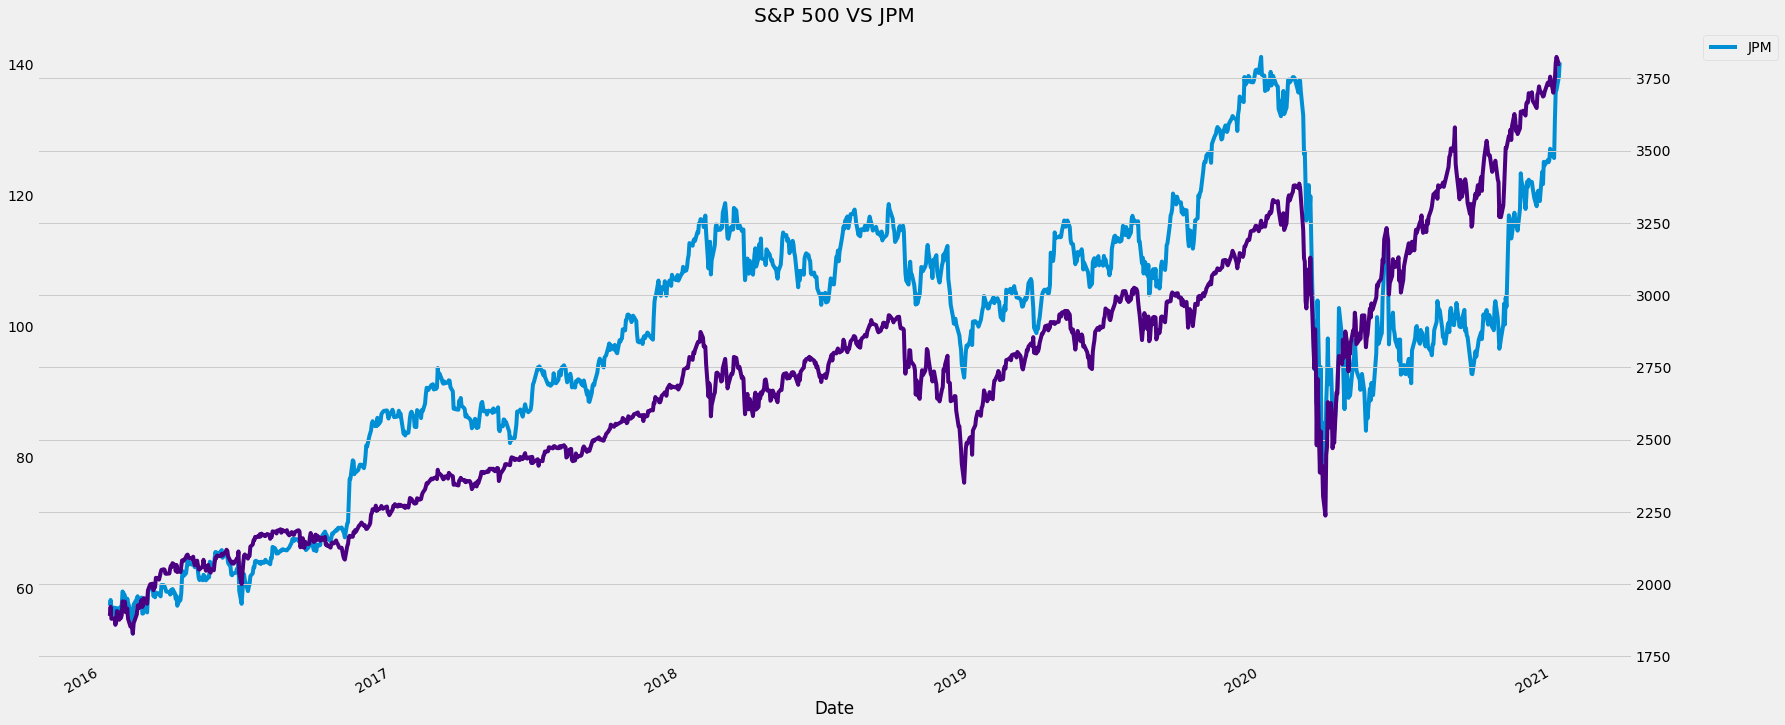

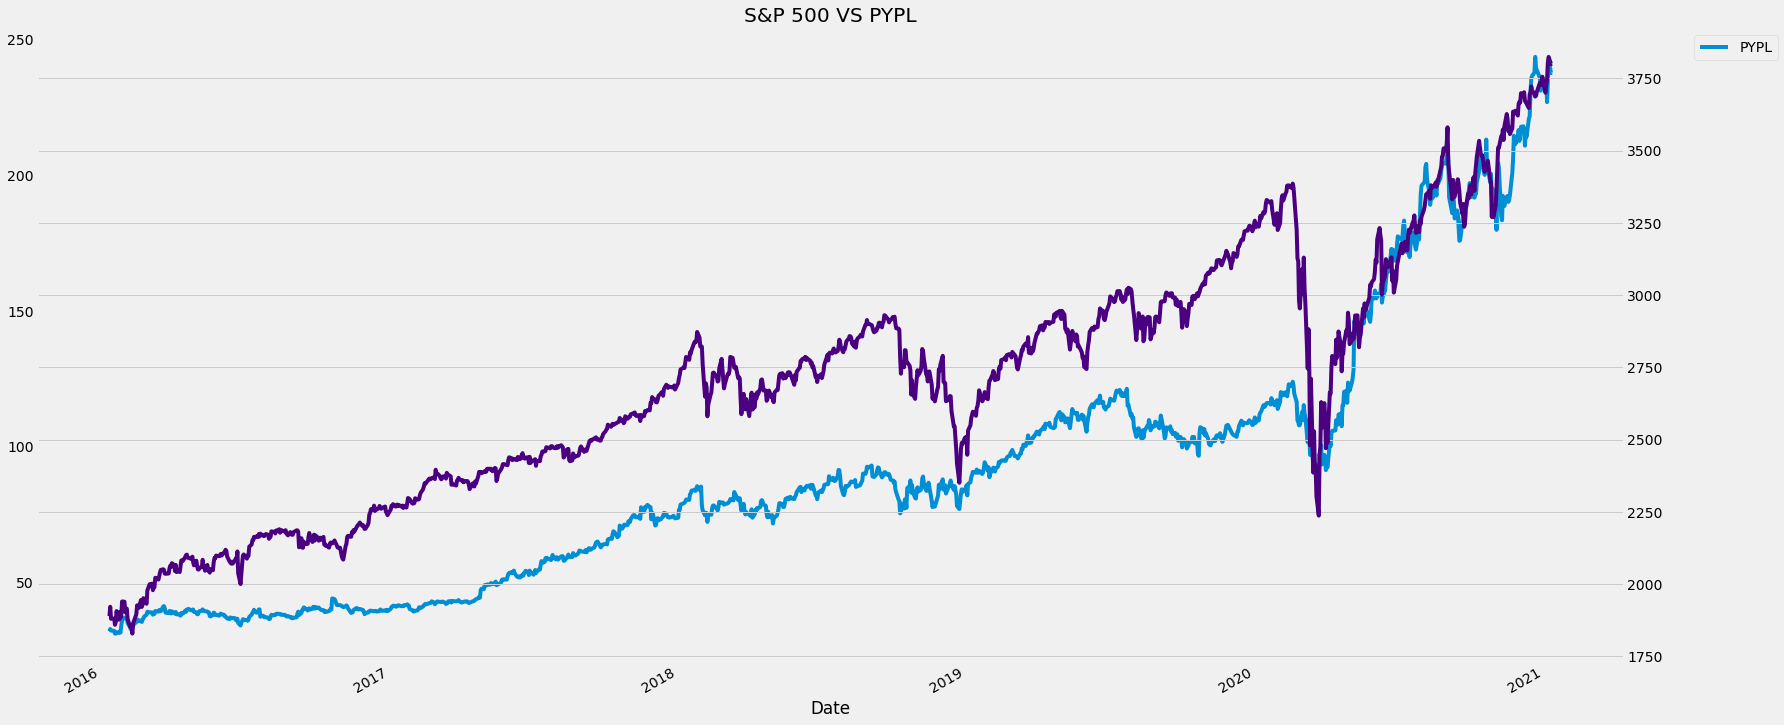

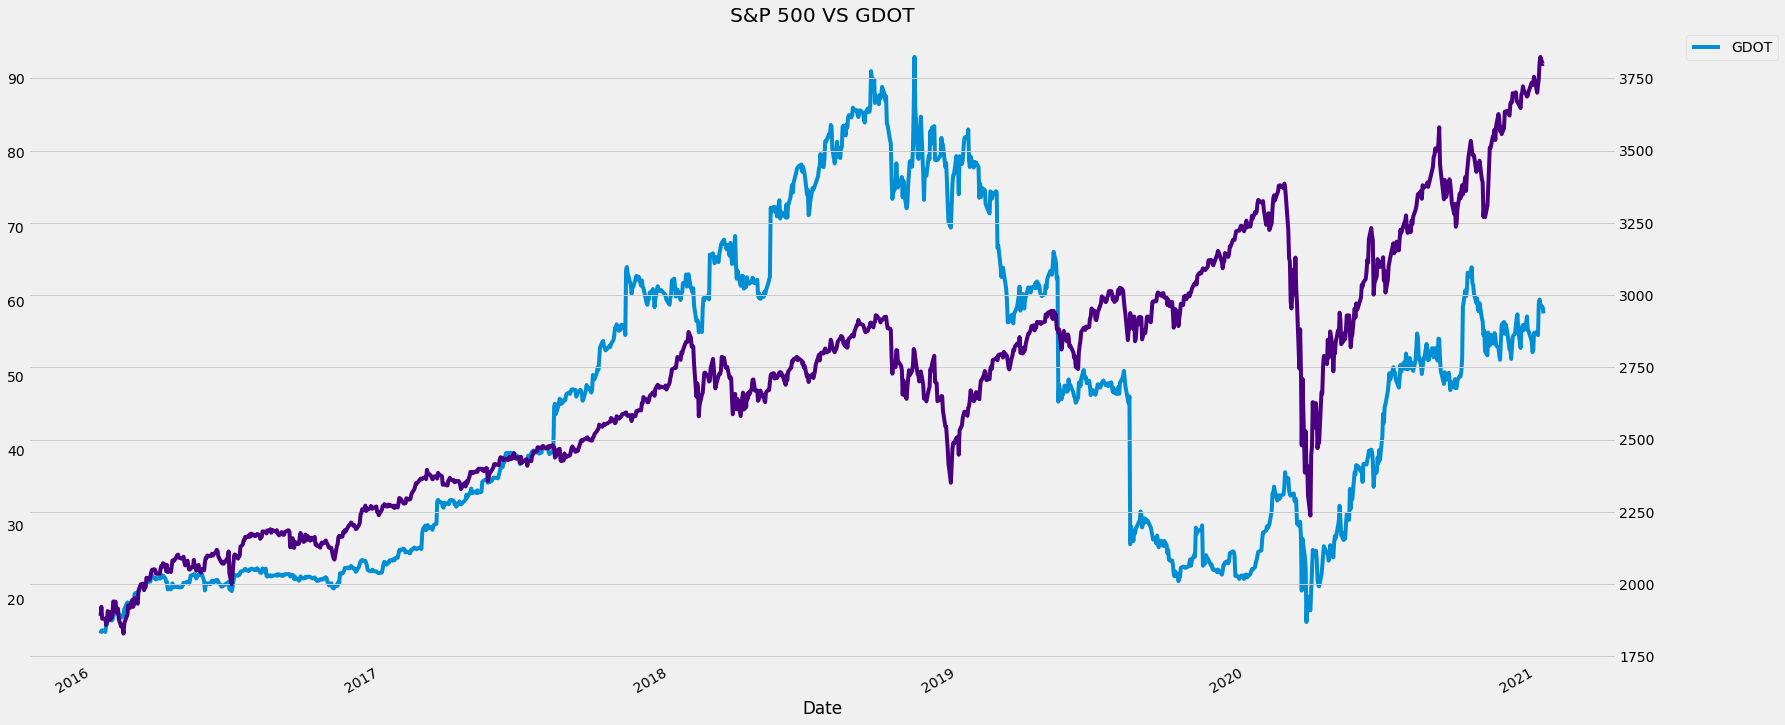

In [10]:
for i in listOfVariables:
    benchmark = stock_close['SP500']
    ax = stock_close[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    


# Moving Averages

In [11]:
close_px = SHOP['Close']
SHOP['50_MA']=close_px.rolling(window=50).mean()
SHOP.head()

Date      Close  Volume  50_MA
0  2016-01-13  21.379999  510500    NaN
1  2016-01-14  20.639999  813700    NaN
2  2016-01-15  19.889999  921200    NaN
3  2016-01-19  20.299999  883500    NaN
4  2016-01-20  20.530001  502600    NaN

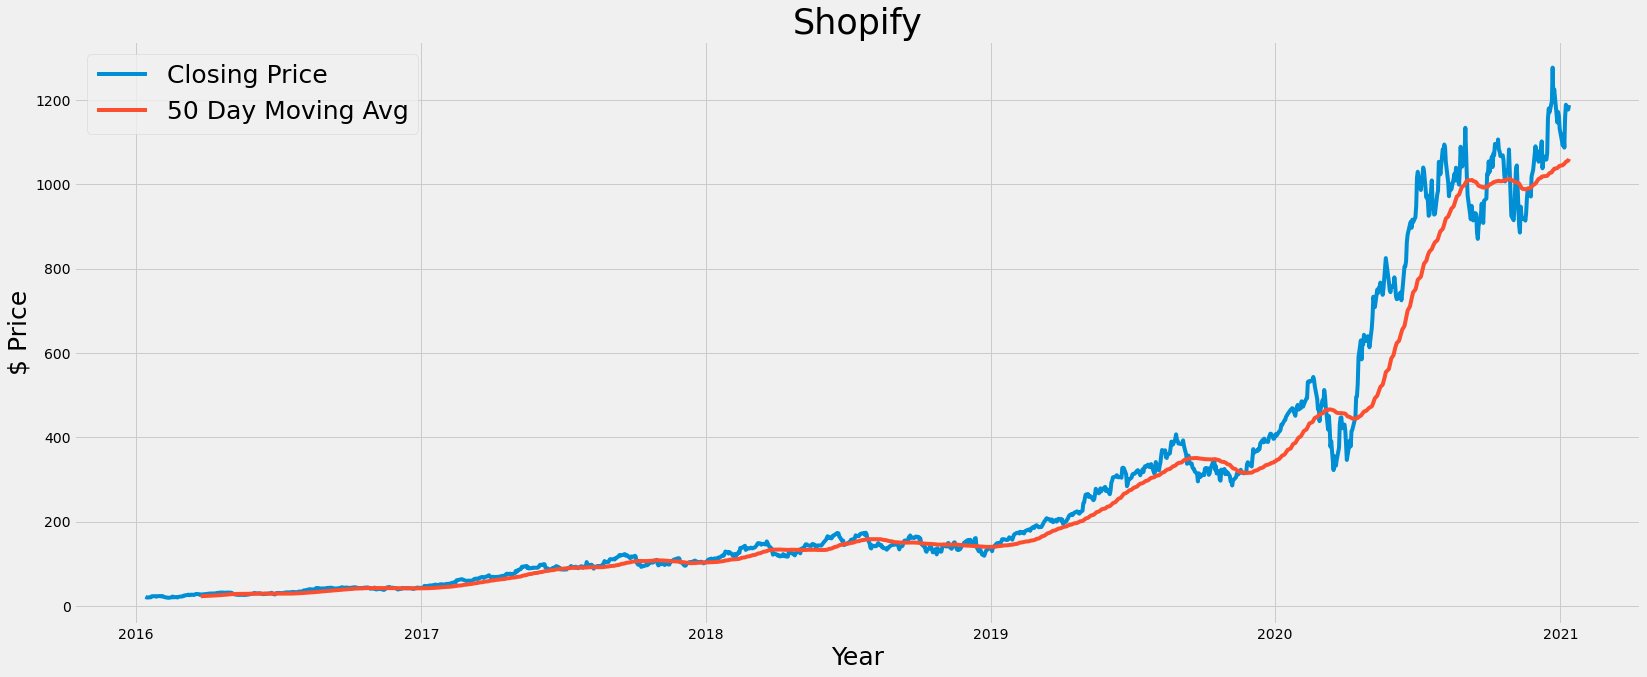

In [12]:
SHOP['Date']=pd.to_datetime(HD['Date'])
SHOP.set_index('Date',inplace=True)
plt.plot('Close', data=SHOP, label='Closing Price')
plt.plot('50_MA', data=SHOP, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Shopify', fontsize=35)
plt.savefig('shop_50.jpg')
plt.show()

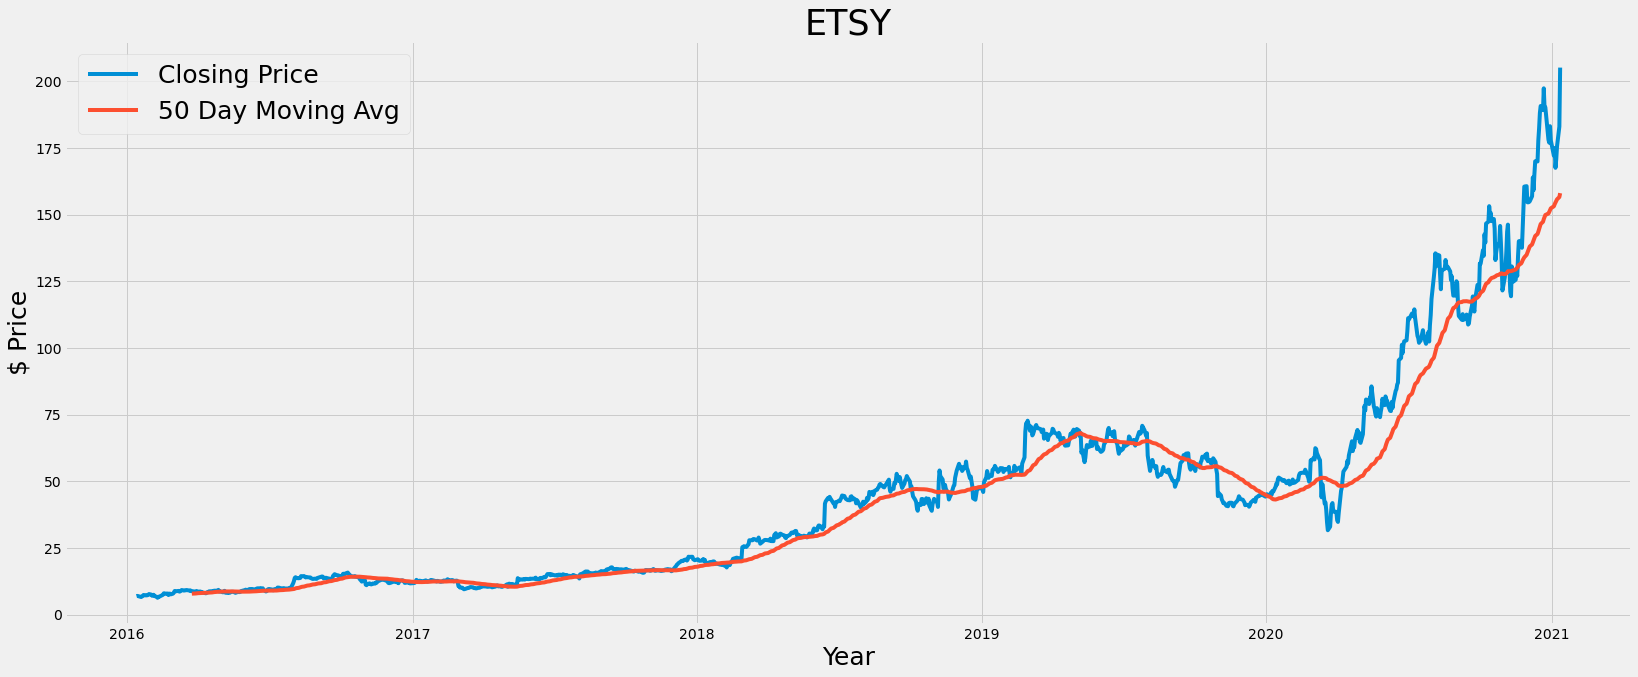

In [13]:
close_px = ETSY['Close']
ETSY['50_MA']=close_px.rolling(window=50).mean()
ETSY['Date']=pd.to_datetime(HD['Date'])
ETSY.set_index('Date',inplace=True)
plt.plot('Close', data=ETSY, label='Closing Price')
plt.plot('50_MA', data=ETSY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('ETSY', fontsize=35)
plt.savefig('etsy_50.jpg')
plt.show()

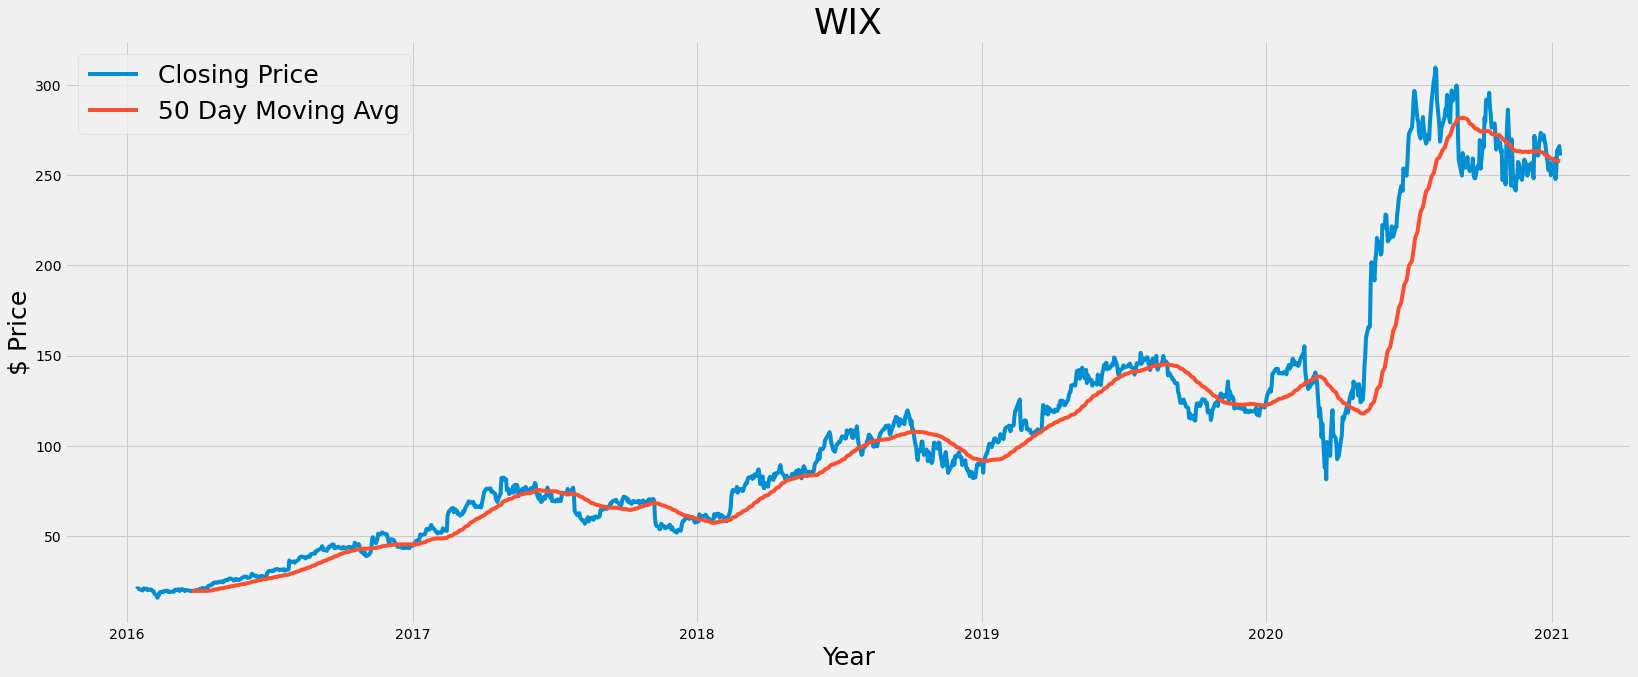

In [14]:
close_px = WIX['Close']
WIX['50_MA']=close_px.rolling(window=50).mean()
WIX['Date']=pd.to_datetime(HD['Date'])
WIX.set_index('Date',inplace=True)
plt.plot('Close', data=WIX, label='Closing Price')
plt.plot('50_MA', data=WIX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('WIX', fontsize=35)
plt.savefig('wix_50.jpg')
plt.show()

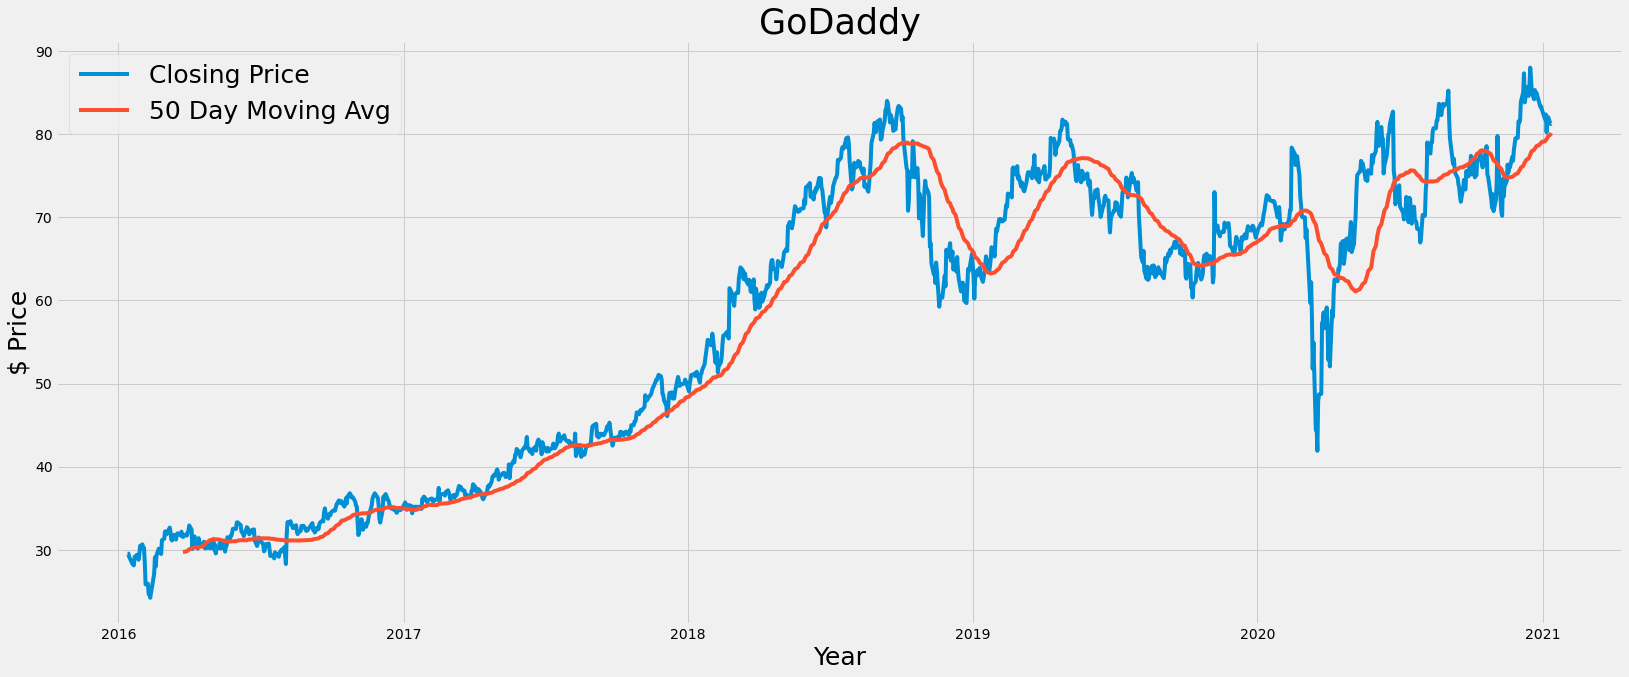

In [15]:
close_px = GDDY['Close']
GDDY['50_MA']=close_px.rolling(window=50).mean()
GDDY['Date']=pd.to_datetime(HD['Date'])
GDDY.set_index('Date',inplace=True)
plt.plot('Close', data=GDDY, label='Closing Price')
plt.plot('50_MA', data=GDDY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('GoDaddy', fontsize=35)
plt.savefig('gddy_50.jpg')
plt.show()

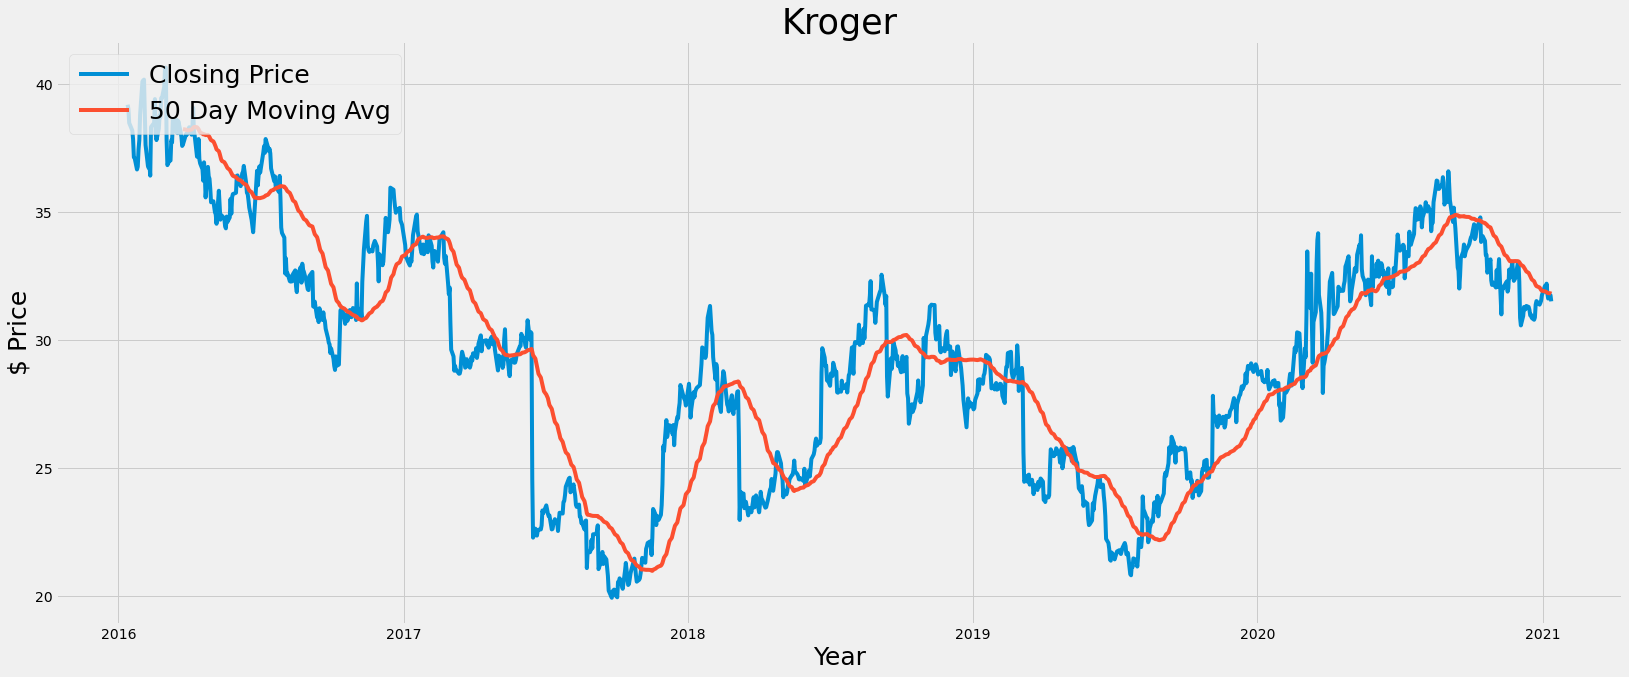

In [16]:
close_px = KR['Close']
KR['50_MA']=close_px.rolling(window=50).mean()
KR['Date']=pd.to_datetime(HD['Date'])
KR.set_index('Date',inplace=True)
plt.plot('Close', data=KR, label='Closing Price')
plt.plot('50_MA', data=KR, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Kroger', fontsize=35)
plt.savefig('kr_50.jpg')
plt.show()

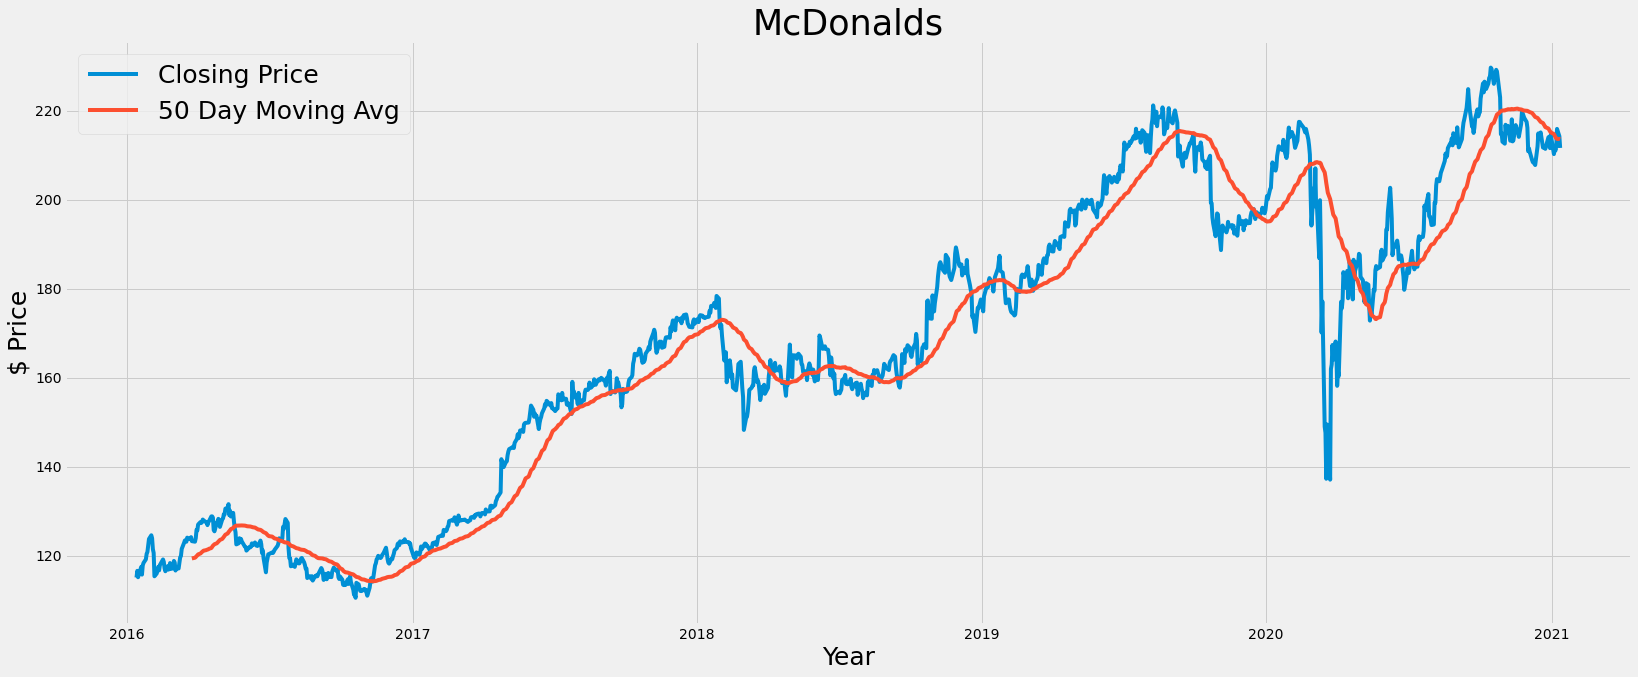

In [17]:
close_px = MCD['Close']
MCD['50_MA']=close_px.rolling(window=50).mean()
MCD['Date']=pd.to_datetime(HD['Date'])
MCD.set_index('Date',inplace=True)
plt.plot('Close', data=MCD, label='Closing Price')
plt.plot('50_MA', data=MCD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('McDonalds', fontsize=35)
plt.savefig('mcd_50.jpg')
plt.show()

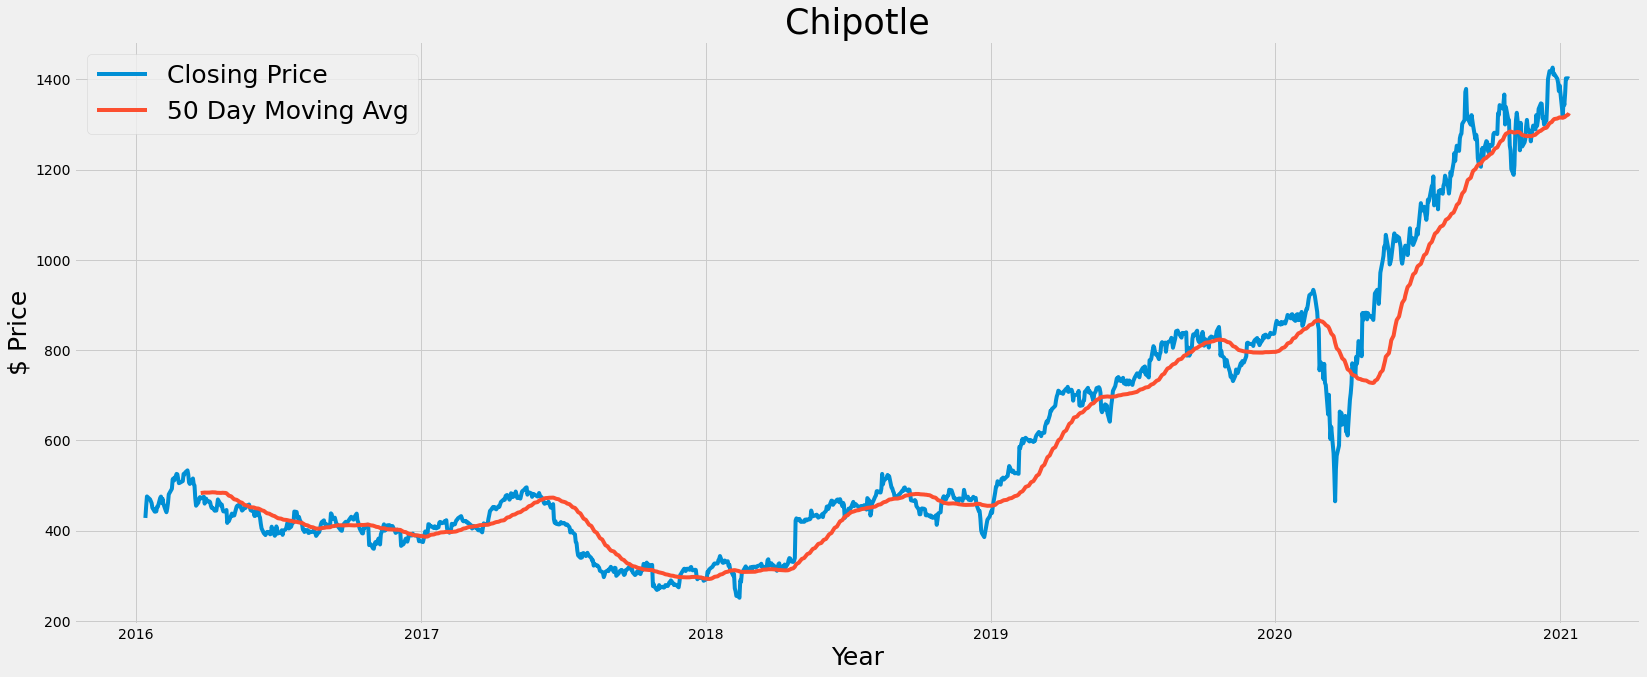

In [18]:
close_px = CMG['Close']
CMG['50_MA']=close_px.rolling(window=50).mean()
CMG['Date']=pd.to_datetime(HD['Date'])
CMG.set_index('Date',inplace=True)
plt.plot('Close', data=CMG, label='Closing Price')
plt.plot('50_MA', data=CMG, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Chipotle', fontsize=35)
plt.savefig('cmg_50.jpg')
plt.show()

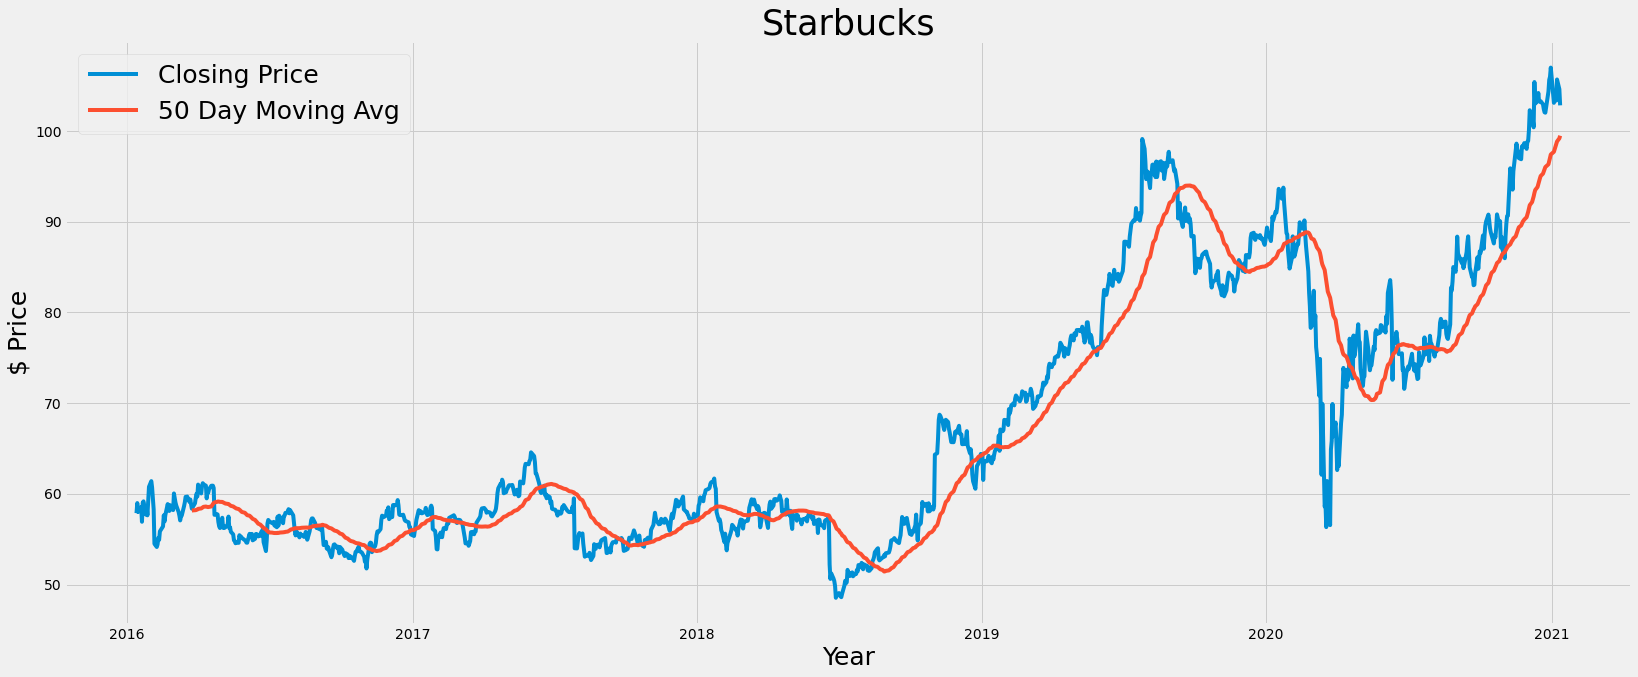

In [19]:
close_px = SBUX['Close']
SBUX['50_MA']=close_px.rolling(window=50).mean()
SBUX['Date']=pd.to_datetime(HD['Date'])
SBUX.set_index('Date',inplace=True)
plt.plot('Close', data=SBUX, label='Closing Price')
plt.plot('50_MA', data=SBUX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Starbucks', fontsize=35)
plt.savefig('sbux_50.jpg')
plt.show()

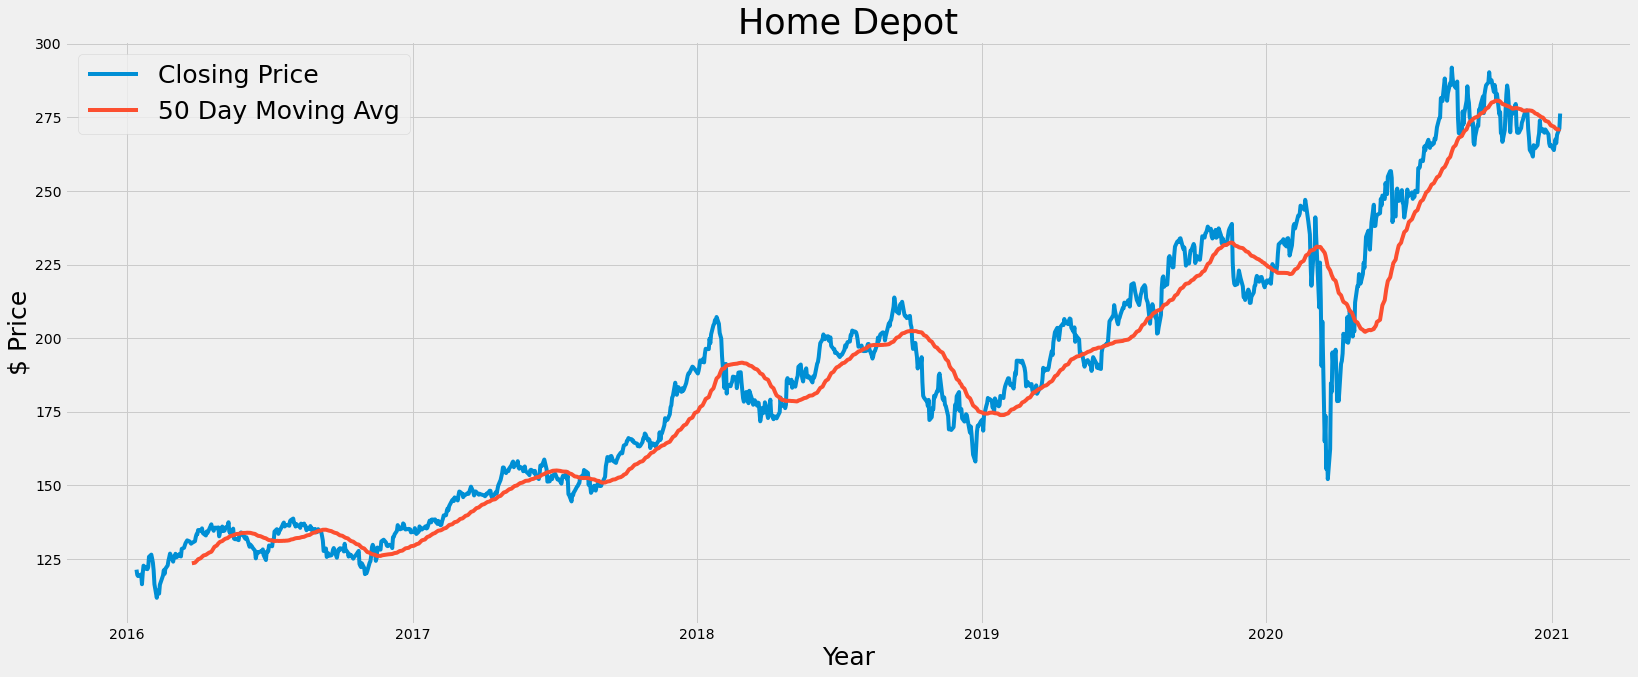

In [20]:
close_px = HD['Close']
HD['50_MA']=close_px.rolling(window=50).mean()
HD['Date']=pd.to_datetime(HD['Date'])
HD.set_index('Date',inplace=True)
plt.plot('Close', data=HD, label='Closing Price')
plt.plot('50_MA', data=HD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Home Depot', fontsize=35)
plt.savefig('hd_50.jpg')
plt.show()

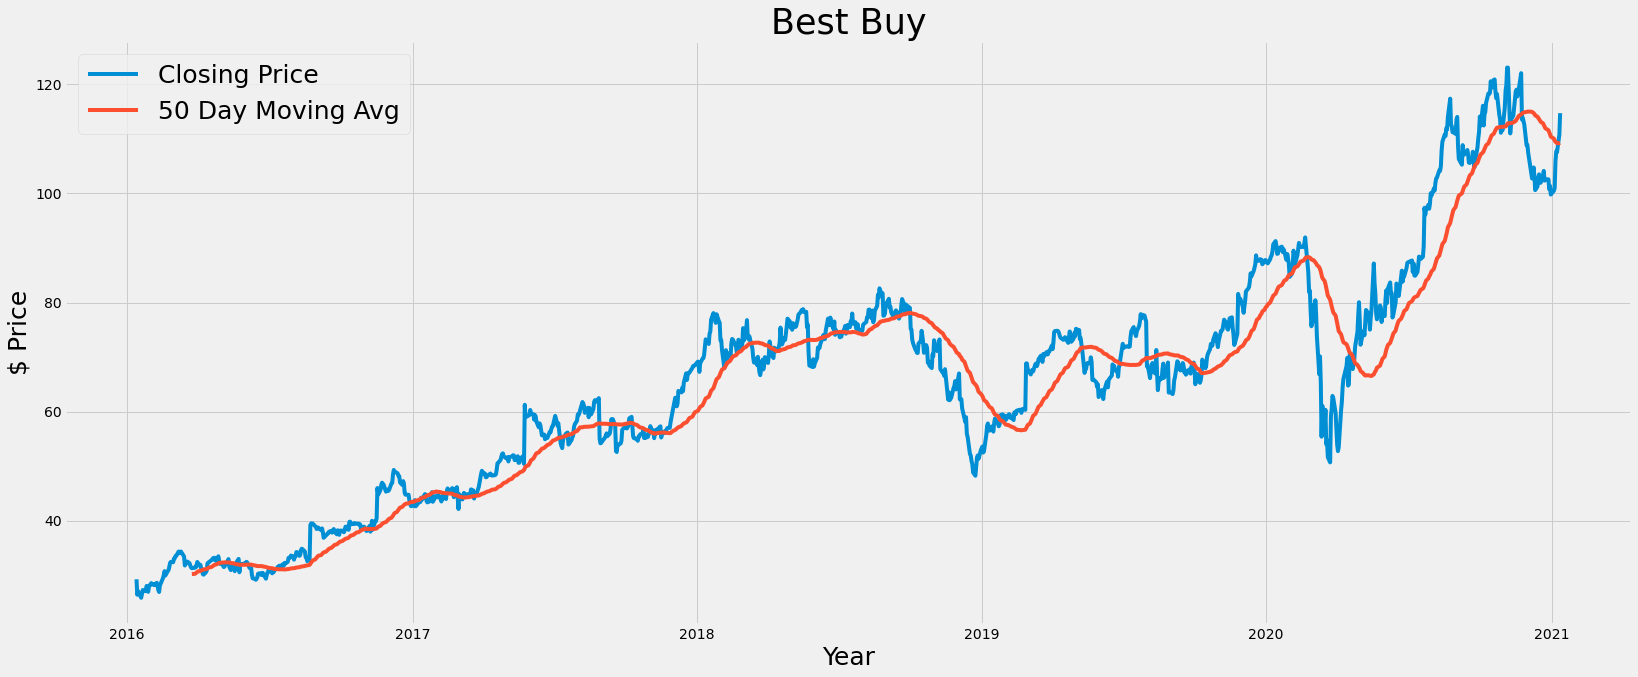

In [21]:
close_px = BBY['Close']
BBY['50_MA']=close_px.rolling(window=50).mean()
BBY['Date']=pd.to_datetime(BBY['Date'])
BBY.set_index('Date',inplace=True)
plt.plot('Close', data=BBY, label='Closing Price')
plt.plot('50_MA', data=BBY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Best Buy', fontsize=35)
plt.savefig('bby_50.jpg')
plt.show()

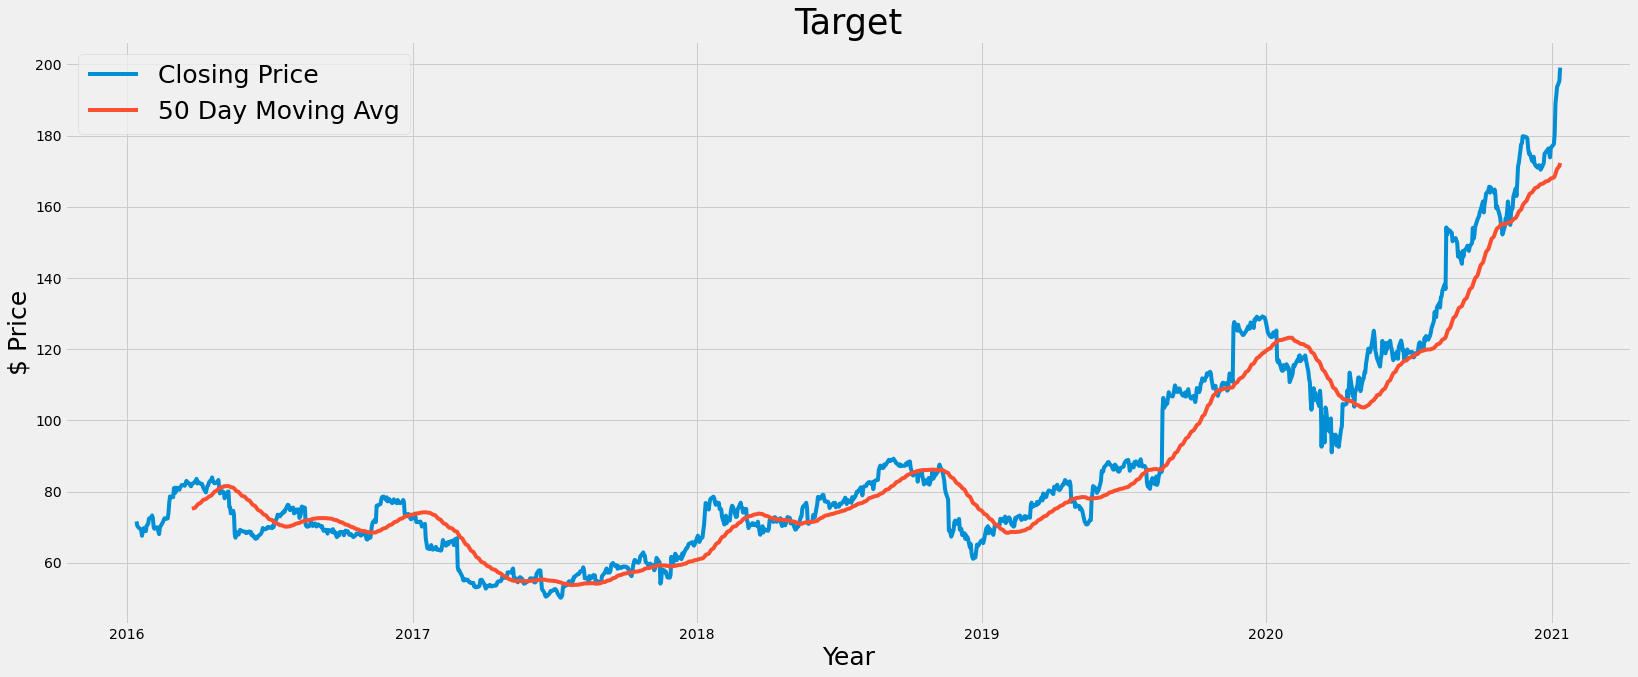

In [22]:
close_px = TGT['Close']
TGT['50_MA']=close_px.rolling(window=50).mean()
TGT['Date']=pd.to_datetime(TGT['Date'])
TGT.set_index('Date',inplace=True)
plt.plot('Close', data=TGT, label='Closing Price')
plt.plot('50_MA', data=TGT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Target', fontsize=35)
plt.savefig('tgt_50.jpg')
plt.show()

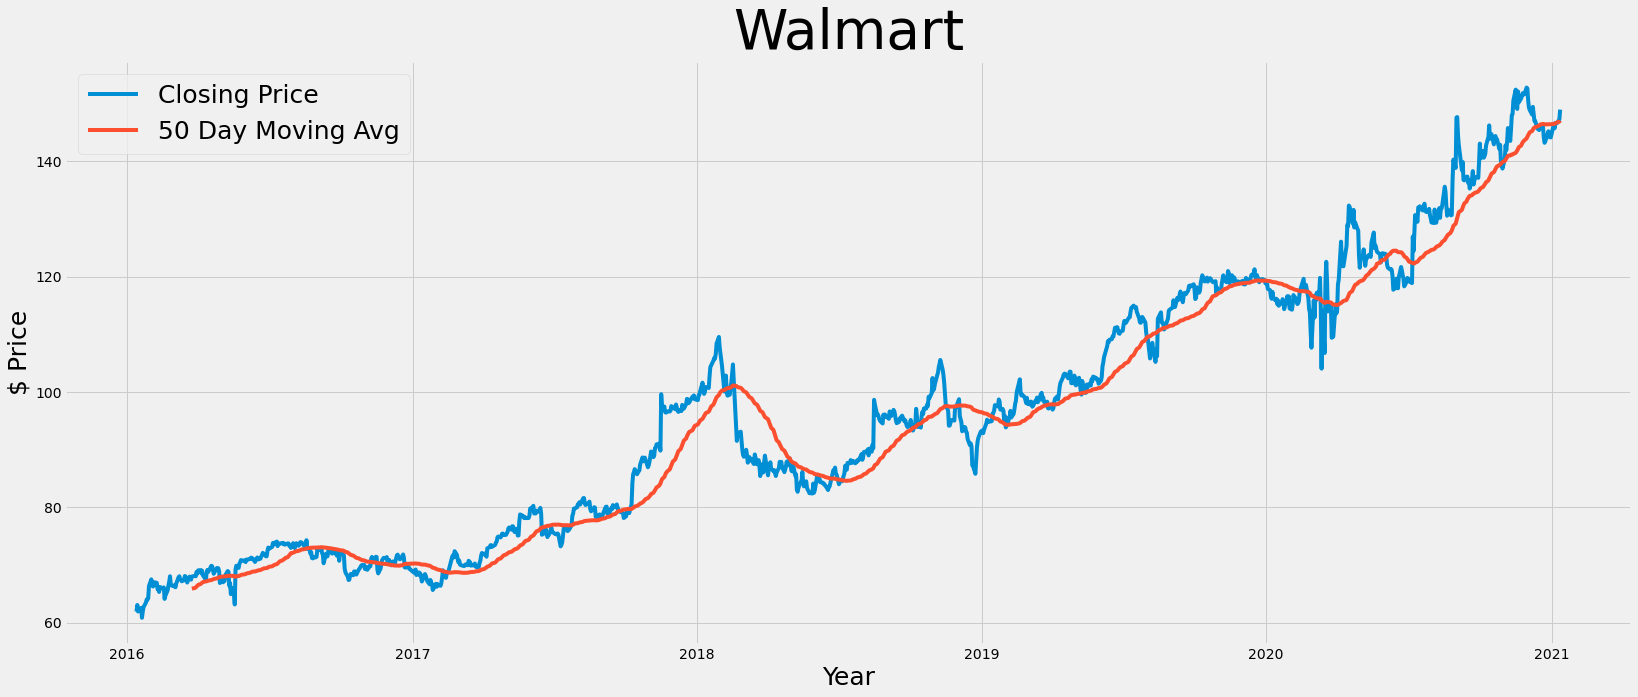

In [23]:
close_px = WMT['Close']
WMT['50_MA']=close_px.rolling(window=50).mean()
WMT['Date']=pd.to_datetime(WMT['Date'])
WMT.set_index('Date',inplace=True)
plt.plot('Close', data=WMT, label='Closing Price')
plt.plot('50_MA', data=WMT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Walmart', fontsize=55)
plt.savefig('wm_50.jpg')
plt.show()

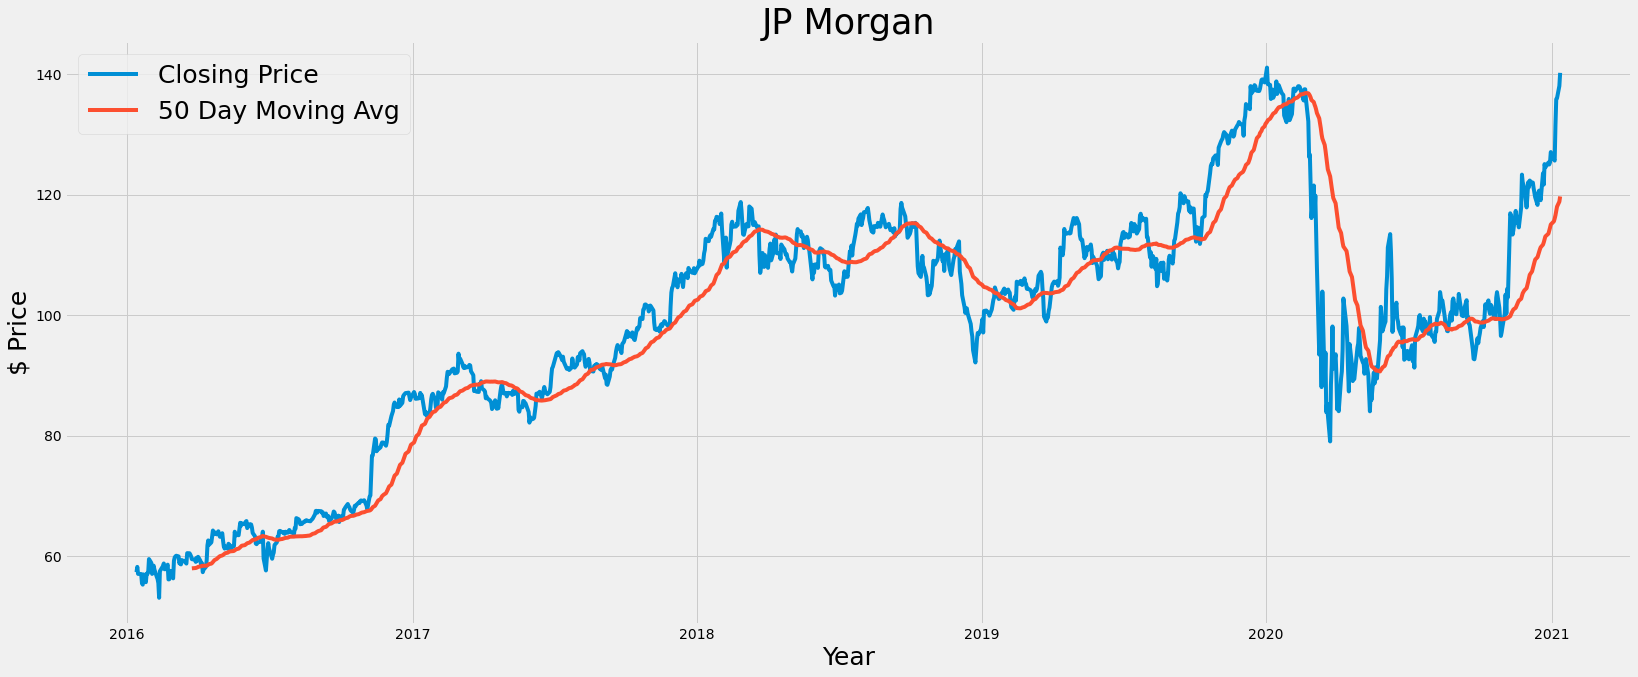

In [24]:
close_px = JPM['Close']
JPM['50_MA']=close_px.rolling(window=50).mean()
JPM['Date']=pd.to_datetime(JPM['Date'])
JPM.set_index('Date',inplace=True)
plt.plot('Close', data=JPM, label='Closing Price')
plt.plot('50_MA', data=JPM, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('JP Morgan', fontsize=35)
plt.savefig('jpm_50.jpg')
plt.show()

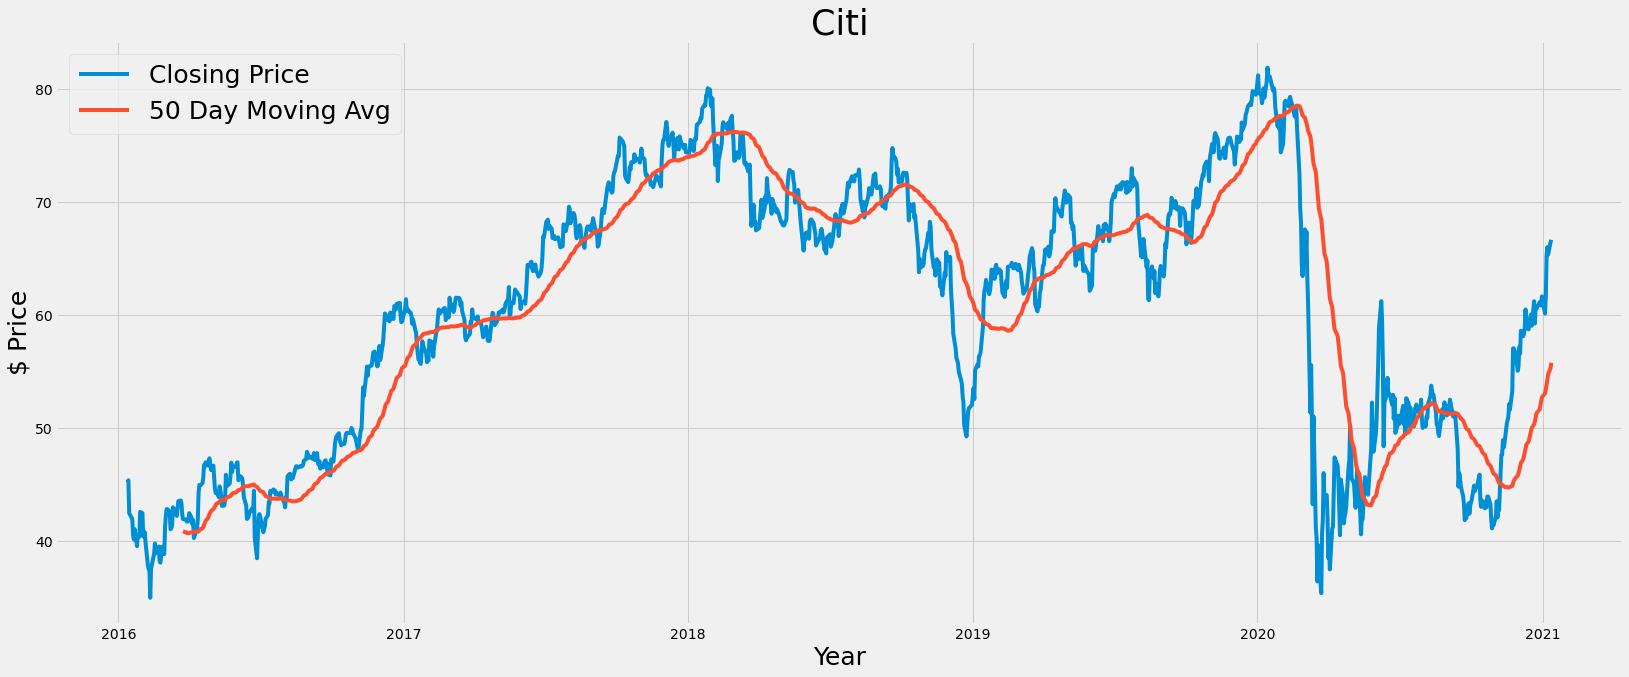

In [25]:
close_px = C['Close']
C['50_MA']=close_px.rolling(window=50).mean()
C['Date']=pd.to_datetime(C['Date'])
C.set_index('Date',inplace=True)
plt.plot('Close', data=C, label='Closing Price')
plt.plot('50_MA', data=C, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Citi', fontsize=35)
plt.savefig('c_50.jpg')
plt.show()

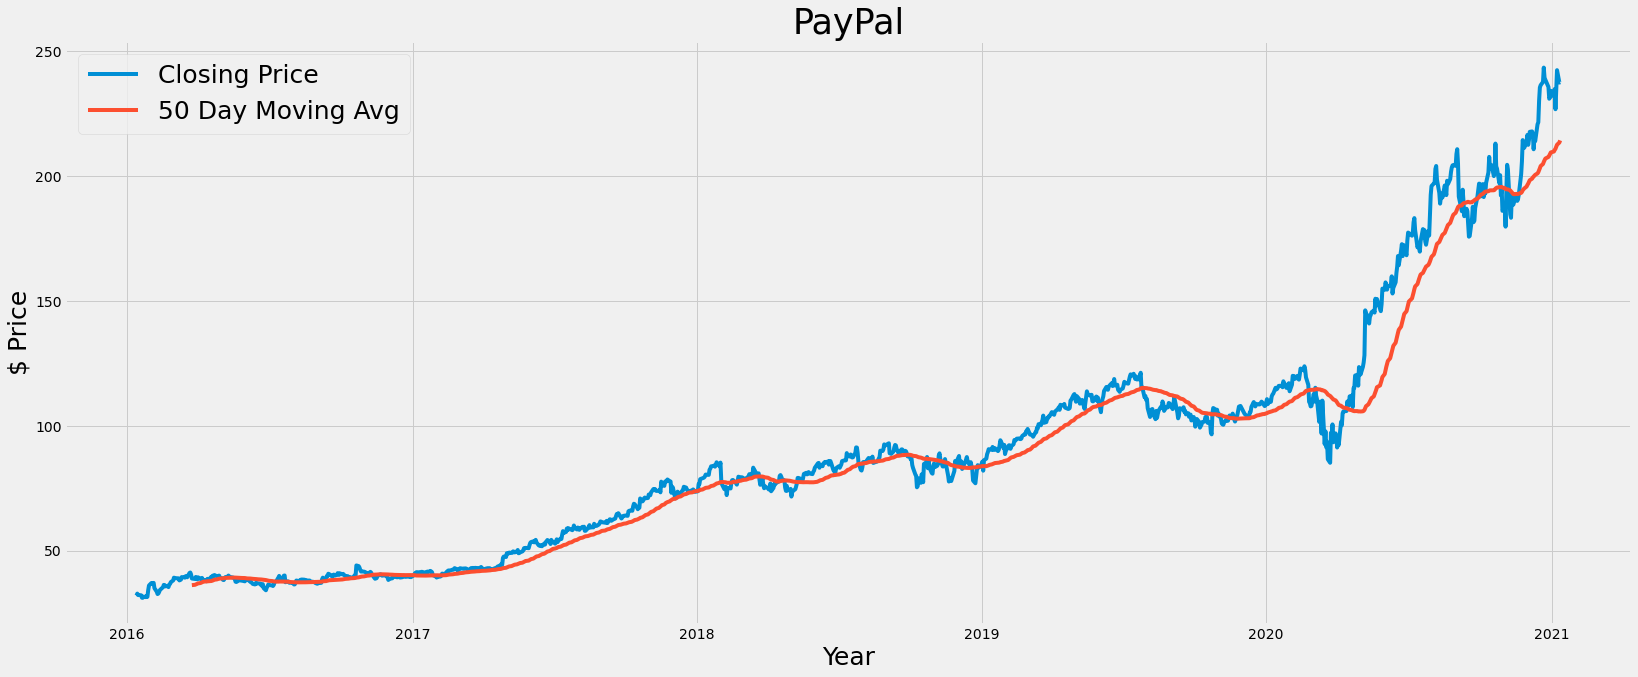

In [26]:
close_px = PYPL['Close']
PYPL['50_MA']=close_px.rolling(window=50).mean()
PYPL['Date']=pd.to_datetime(PYPL['Date'])
PYPL.set_index('Date',inplace=True)
plt.plot('Close', data=PYPL, label='Closing Price')
plt.plot('50_MA', data=PYPL, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('PayPal', fontsize=35)
plt.savefig('pypl_50.jpg')
plt.show()

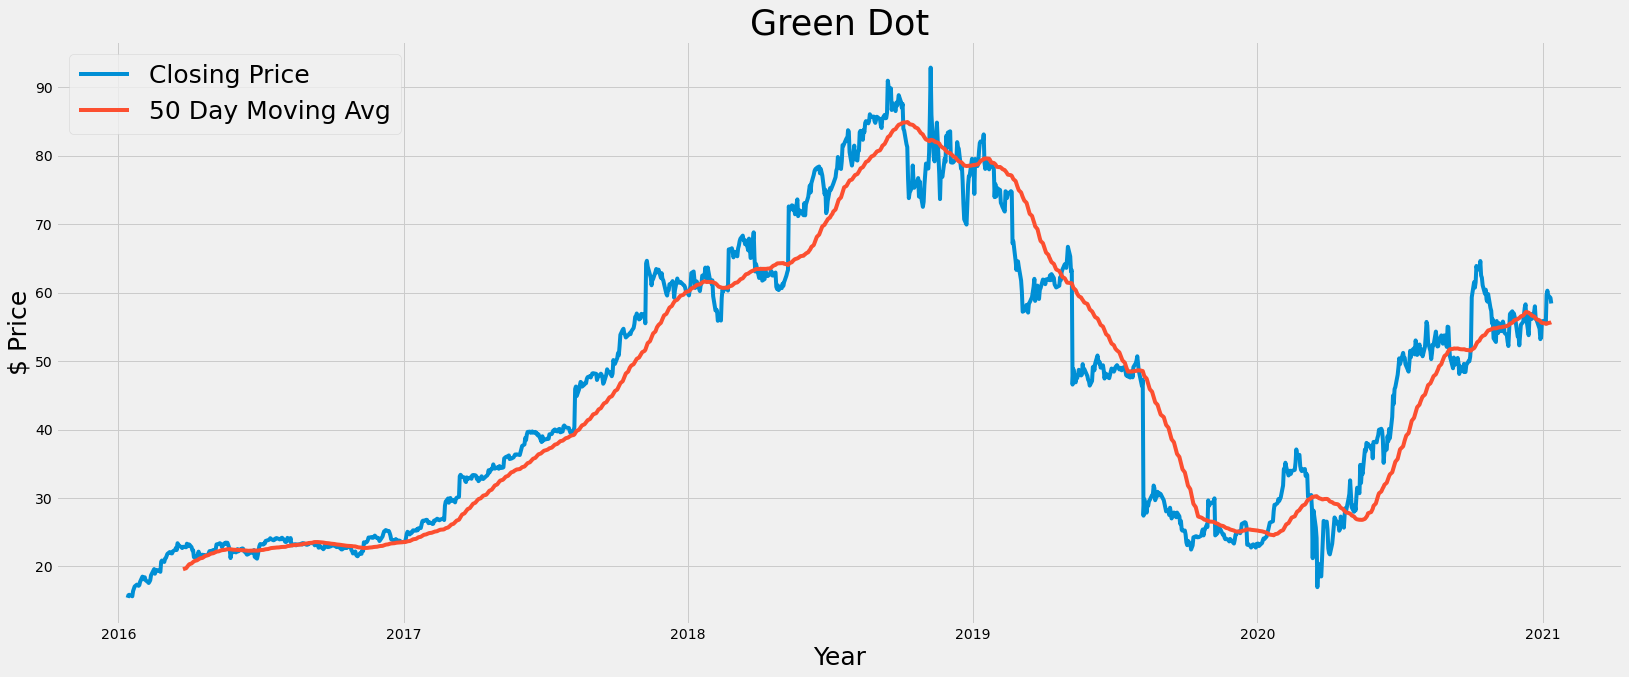

In [27]:
close_px = GDOT['Close']
GDOT['50_MA']=close_px.rolling(window=50).mean()
GDOT['Date']=pd.to_datetime(GDOT['Date'])
GDOT.set_index('Date',inplace=True)
plt.plot('Close', data=GDOT, label='Closing Price')
plt.plot('50_MA', data=GDOT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Green Dot', fontsize=35)
plt.savefig('gdot_50.jpg')
plt.show()

# Annual / Semi Annual Growth

In [28]:
new = stock_close
full_dates = pd.date_range(start='01/12/2016', end='01/12/2021')

yoy_growth = new.reindex(full_dates)
yoy_growth

yoy_growth['SHOP'] = yoy_growth['SHOP'].fillna(method='ffill')
yoy_growth['SHOP%'] = yoy_growth['SHOP'].pct_change(183)

yoy_growth['ETSY'] = yoy_growth['ETSY'].fillna(method='ffill')
yoy_growth['ETSY%'] = yoy_growth['ETSY'].pct_change(183)

yoy_growth['WIX'] = yoy_growth['WIX'].fillna(method='ffill')
yoy_growth['WIX%'] = yoy_growth['WIX'].pct_change(183)

yoy_growth['GDDY'] = yoy_growth['GDDY'].fillna(method='ffill')
yoy_growth['GDDY%'] = yoy_growth['GDDY'].pct_change(183)

yoy_growth['KR'] = yoy_growth['KR'].fillna(method='ffill')
yoy_growth['KR%'] = yoy_growth['KR'].pct_change(183)

yoy_growth['MCD'] = yoy_growth['MCD'].fillna(method='ffill')
yoy_growth['MCD%'] = yoy_growth['MCD'].pct_change(183)

yoy_growth['CMG'] = yoy_growth['CMG'].fillna(method='ffill')
yoy_growth['CMG%'] = yoy_growth['CMG'].pct_change(183)

yoy_growth['SBUX'] = yoy_growth['SBUX'].fillna(method='ffill')
yoy_growth['SBUX%'] = yoy_growth['SBUX'].pct_change(183)

yoy_growth['BBY'] = yoy_growth['BBY'].fillna(method='ffill')
yoy_growth['BBY%'] = yoy_growth['BBY'].pct_change(183)

yoy_growth['HD'] = yoy_growth['HD'].fillna(method='ffill')
yoy_growth['HD%'] = yoy_growth['HD'].pct_change(183)

yoy_growth['WMT'] = yoy_growth['WMT'].fillna(method='ffill')
yoy_growth['WMT%'] = yoy_growth['WMT'].pct_change(183)

yoy_growth['TGT'] = yoy_growth['TGT'].fillna(method='ffill')
yoy_growth['TGT%'] = yoy_growth['TGT'].pct_change(183)

yoy_growth['C'] = yoy_growth['C'].fillna(method='ffill')
yoy_growth['C%'] = yoy_growth['C'].pct_change(183)

yoy_growth['JPM'] = yoy_growth['JPM'].fillna(method='ffill')
yoy_growth['JPM%'] = yoy_growth['JPM'].pct_change(183)

yoy_growth['PYPL'] = yoy_growth['PYPL'].fillna(method='ffill')
yoy_growth['PYPL%'] = yoy_growth['PYPL'].pct_change(183)

yoy_growth['GDOT'] = yoy_growth['GDOT'].fillna(method='ffill')
yoy_growth['GDOT%'] = yoy_growth['GDOT'].pct_change(183)

yoy_growth['SP500'] = yoy_growth['SP500'].fillna(method='ffill')
yoy_growth['SP500%'] = yoy_growth['SP500'].pct_change(183)

columns_to_keep = ['SHOP%','ETSY%','WIX%','GDDY%', 'KR%','MCD%','CMG%','SBUX%','BBY%', 'HD%', 'WMT%', 
                   'TGT%', 'C%', 'JPM%', 'PYPL%','GDOT%', 'SP500%']

yoy_growth = yoy_growth[columns_to_keep]
stock_close.head()

SHOP  ETSY        WIX       GDDY         KR         MCD  \
Date                                                                       
2016-01-13  21.379999  6.99  20.760000  29.549999  39.200001  115.120003   
2016-01-14  20.639999  7.07  21.150000  29.559999  39.029999  116.620003   
2016-01-15  19.889999  7.00  21.040001  29.170000  38.490002  115.180000   
2016-01-19  20.299999  6.65  20.170000  28.340000  38.189999  117.500000   
2016-01-20  20.530001  6.88  19.969999  28.230000  37.849998  115.779999   

                   CMG       SBUX        BBY          HD        TGT  \
Date                                                                  
2016-01-13  428.279999  57.869999  29.260000  121.400002  71.639999   
2016-01-14  454.299988  58.980000  26.430000  119.620003  70.410004   
2016-01-15  475.940002  58.000000  27.110001  119.230003  70.080002   
2016-01-19  469.470001  58.549999  25.870001  119.760002  69.239998   
2016-01-20  465.500000  56.919998  26.530001  116.459999  67.589996   

                  WMT          C        JPM       PYPL   GDOT        SP500  
Date                                                                        
2016-01-13  61.919998  45.189999  57.340000  32.119999  15.43  1890.280029  
2016-01-14  63.060001  45.380001  58.200001  32.869999  15.80  1921.839966  
2016-01-15  61.930000  42.470001  57.040001  32.310001  15.87  1880.329956  
2016-01-19  62.560001  41.939999  57.009998  32.200001  15.65  1881.329956  
2016-01-20  60.840000  40.490002  55.509998  31.200001  16.42  1859.329956

In [29]:
yoy_growth.index.name = 'Date'
yoy_growth
semi_annual_growth = yoy_growth
semi_annual_growth.head()

SHOP%  ETSY%  WIX%  GDDY%  KR%  MCD%  CMG%  SBUX%  BBY%  HD%  \
Date                                                                       
2016-01-12    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-13    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-14    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-15    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-16    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   

            WMT%  TGT%  C%  JPM%  PYPL%  GDOT%  SP500%  
Date                                                    
2016-01-12   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-13   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-14   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-15   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-16   NaN   NaN NaN   NaN    NaN    NaN     NaN

In [30]:
# annual_growth.to_excel('annual_growth.xlsx', index=True)
july_13 = stock_close.loc['7/13/2020']
july_13

jan_12 = stock_close.loc['1/12/2021']
jan_12

six_month_growth = (jan_12 - july_13)/july_13
# six_month_growth.to_excel('six_month_growth.xlsx')


# Forecast

In [31]:
from fbprophet import Prophet

In [32]:
SHOP.head()

Close  Volume  50_MA
Date                                
2016-01-13  21.379999  510500    NaN
2016-01-14  20.639999  813700    NaN
2016-01-15  19.889999  921200    NaN
2016-01-19  20.299999  883500    NaN
2016-01-20  20.530001  502600    NaN

In [33]:
shop_df = SHOP['Close'].to_frame()
shop_df.reset_index(level=0, inplace=True)
shop_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
shop_df.head()

ds          y
0 2016-01-13  21.379999
1 2016-01-14  20.639999
2 2016-01-15  19.889999
3 2016-01-19  20.299999
4 2016-01-20  20.530001

In [34]:
shop_model = Prophet(interval_width = 0.95, daily_seasonality=True)
shop_model.fit(shop_df)

In [35]:
shop_forecast = shop_model.make_future_dataframe(periods = 152)
shop_forecast = shop_model.predict(shop_forecast)

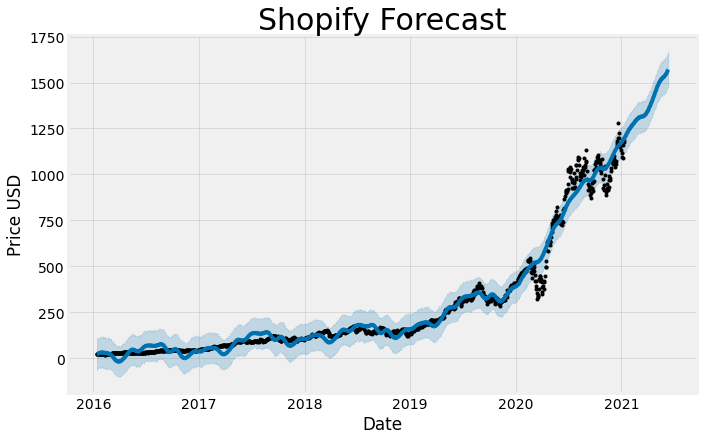

In [36]:
shop_model.plot(shop_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Shopify Forecast', fontsize=30);

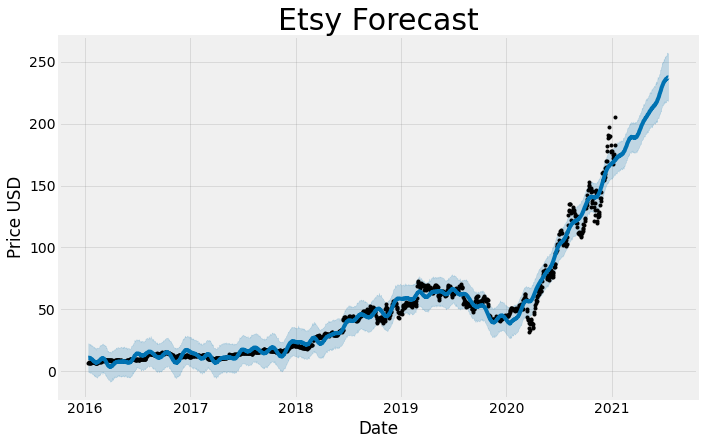

In [37]:
etsy_df = ETSY['Close'].to_frame()
etsy_df.reset_index(level=0, inplace=True)
etsy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
etsy_df.head()

etsy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
etsy_model.fit(etsy_df)

etsy_forecast = etsy_model.make_future_dataframe(periods = 183)
etsy_forecast = etsy_model.predict(etsy_forecast)

etsy_model.plot(etsy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Etsy Forecast', fontsize=30);

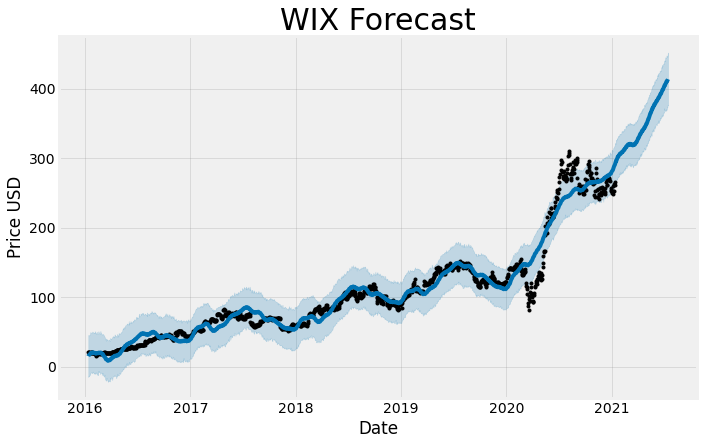

In [38]:
wix_df = WIX['Close'].to_frame()
wix_df.reset_index(level=0, inplace=True)
wix_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

wix_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wix_model.fit(wix_df)

wix_forecast = wix_model.make_future_dataframe(periods = 183)
wix_forecast = wix_model.predict(wix_forecast)

wix_model.plot(wix_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('WIX Forecast', fontsize=30);

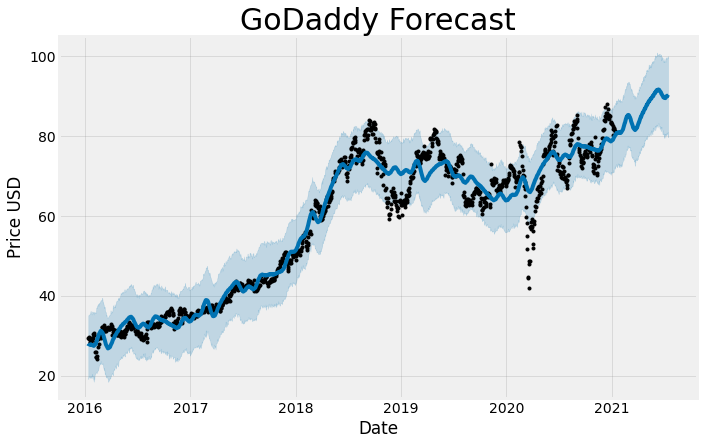

In [39]:
gddy_df = GDDY['Close'].to_frame()
gddy_df.reset_index(level=0, inplace=True)
gddy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
gddy_df.head()

gddy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gddy_model.fit(gddy_df)

gddy_forecast = gddy_model.make_future_dataframe(periods = 183)
gddy_forecast = gddy_model.predict(gddy_forecast)

gddy_model.plot(gddy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('GoDaddy Forecast', fontsize=30);

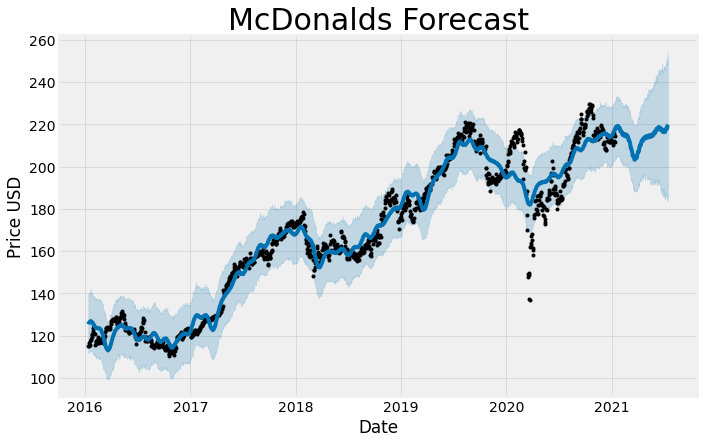

In [40]:
mcd_df = MCD['Close'].to_frame()
mcd_df.reset_index(level=0, inplace=True)
mcd_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
mcd_df.head()

mcd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
mcd_model.fit(mcd_df)

mcd_forecast = mcd_model.make_future_dataframe(periods = 183)
mcd_forecast = mcd_model.predict(mcd_forecast)

mcd_model.plot(mcd_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('McDonalds Forecast', fontsize=30);

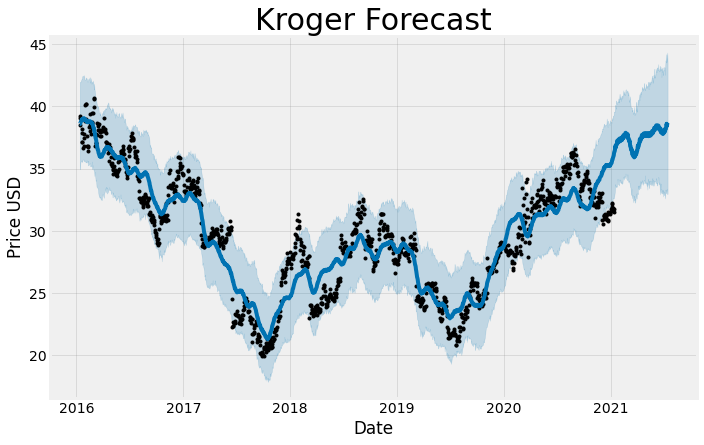

In [41]:
kr_df = KR['Close'].to_frame()
kr_df.reset_index(level=0, inplace=True)
kr_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
kr_df.head()

kr_model = Prophet(interval_width = 0.95, daily_seasonality=True)
kr_model.fit(kr_df)

kr_forecast = kr_model.make_future_dataframe(periods = 183)
kr_forecast = kr_model.predict(kr_forecast)

kr_model.plot(kr_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Kroger Forecast', fontsize=30);

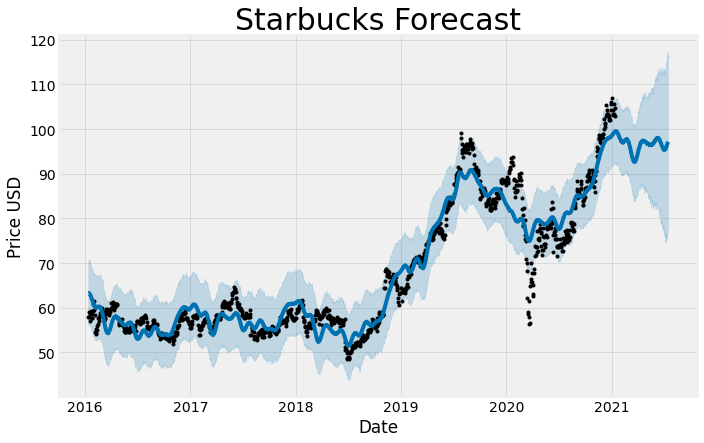

In [42]:
sbux_df = SBUX['Close'].to_frame()
sbux_df.reset_index(level=0, inplace=True)
sbux_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

sbux_model = Prophet(interval_width = 0.95, daily_seasonality=True)
sbux_model.fit(sbux_df)

sbux_forecast = sbux_model.make_future_dataframe(periods = 183)
sbux_forecast = sbux_model.predict(sbux_forecast)

sbux_model.plot(sbux_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Starbucks Forecast', fontsize=30);

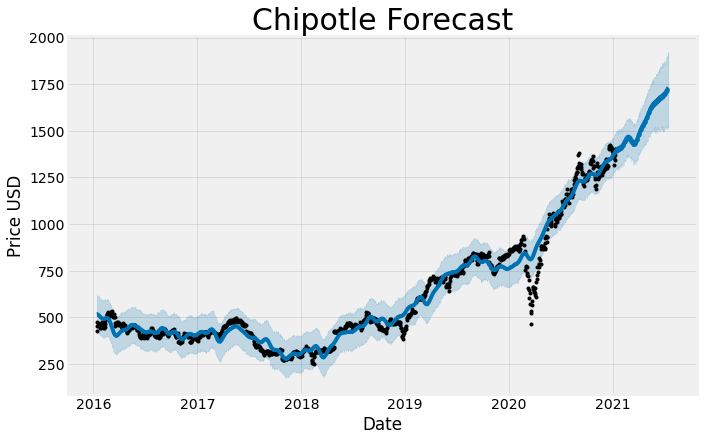

In [43]:
cmg_df = CMG['Close'].to_frame()
cmg_df.reset_index(level=0, inplace=True)
cmg_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
cmg_df.head()

cmg_model = Prophet(interval_width = 0.95, daily_seasonality=True)
cmg_model.fit(cmg_df)

cmg_forecast = cmg_model.make_future_dataframe(periods = 183)
cmg_forecast = cmg_model.predict(cmg_forecast)

cmg_model.plot(cmg_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Chipotle Forecast', fontsize=30);

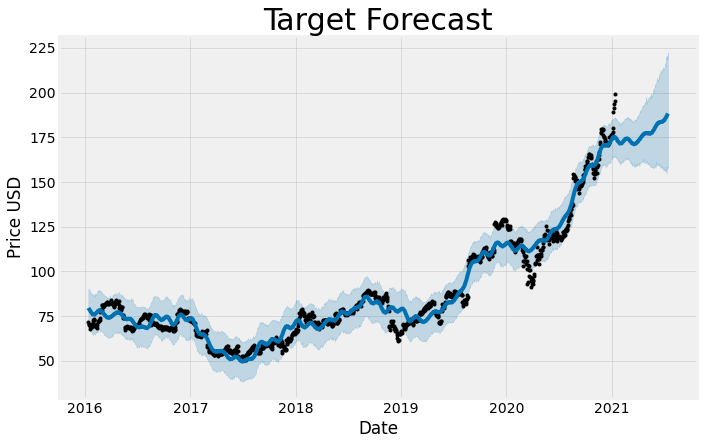

In [44]:
tgt_df = TGT['Close'].to_frame() 
tgt_df.reset_index(level=0, inplace=True)
tgt_df.rename(columns = {'Date': 'ds', 'Close':'y'}, inplace=True)

tgt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
tgt_model.fit(tgt_df)

tgt_forecast = tgt_model.make_future_dataframe(periods = 183)
tgt_forecast = tgt_model.predict(tgt_forecast)

tgt_model.plot(tgt_forecast, xlabel = 'Date', ylabel = 'Price USD')
plt.title('Target Forecast', fontsize=30);

Text(0.5, 1.0, 'Walmart Forecast')

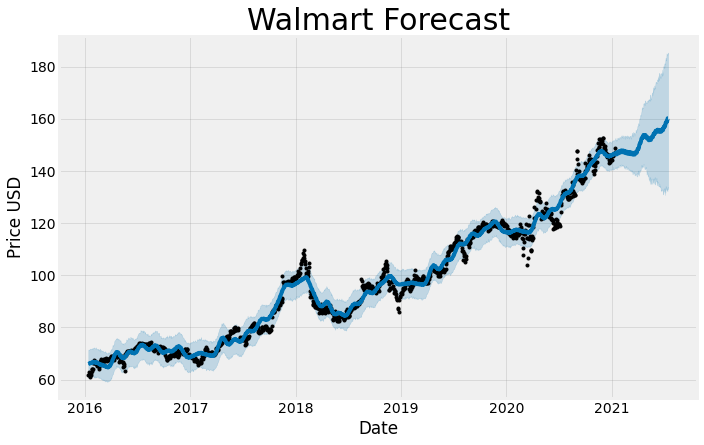

In [45]:
wmt_df = WMT['Close'].to_frame()
wmt_df.reset_index(level=0, inplace=True)
wmt_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

wmt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wmt_model.fit(wmt_df)

wmt_forecast = wmt_model.make_future_dataframe(periods = 183)
wmt_forecast = wmt_model.predict(wmt_forecast)

wmt_model.plot(wmt_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Walmart Forecast', fontsize=30)


Text(0.5, 1.0, 'Best Buy Forecast')

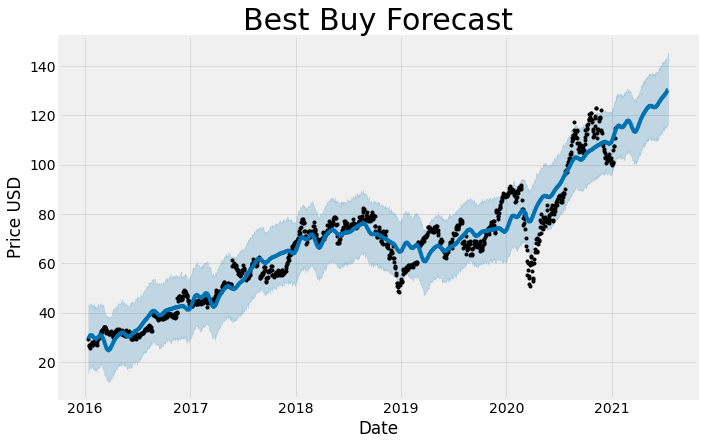

In [46]:
bby_df = BBY['Close'].to_frame()
bby_df.reset_index(level=0, inplace=True)
bby_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

bby_model = Prophet(interval_width = 0.95, daily_seasonality=True)
bby_model.fit(bby_df)

bby_forecast = bby_model.make_future_dataframe(periods = 183)
bby_forecast = bby_model.predict(bby_forecast)

bby_model.plot(bby_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Best Buy Forecast', fontsize=30)

Text(0.5, 1.0, 'Home Depot Forecast')

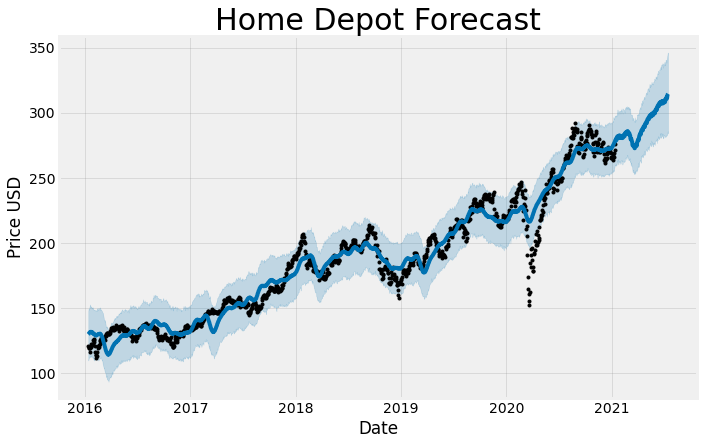

In [47]:
hd_df = HD['Close'].to_frame()
hd_df.reset_index(level=0, inplace=True)
hd_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

hd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
hd_model.fit(hd_df)

hd_forecast = hd_model.make_future_dataframe(periods = 183)
hd_forecast = hd_model.predict(hd_forecast)

hd_model.plot(hd_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Home Depot Forecast', fontsize=30)

Text(0.5, 1.0, 'JP Morgan Forecast')

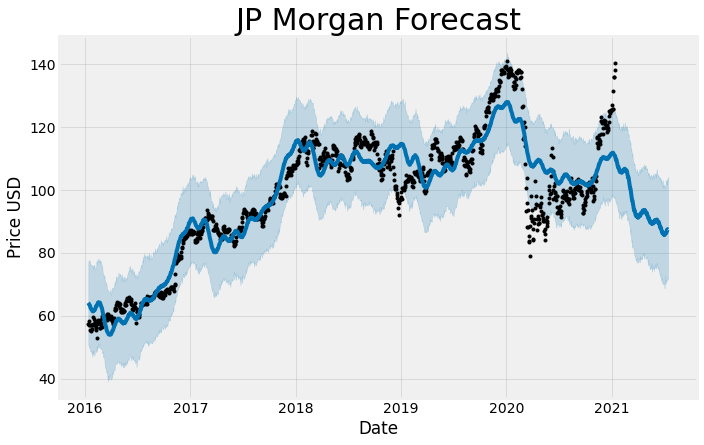

In [48]:
jpm_df = JPM['Close'].to_frame()
jpm_df.reset_index(level=0, inplace=True)
jpm_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

jpm_model = Prophet(interval_width = 0.95, daily_seasonality=True)
jpm_model.fit(jpm_df)

jpm_forecast = jpm_model.make_future_dataframe(periods = 183)
jpm_forecast = jpm_model.predict(jpm_forecast)

jpm_model.plot(jpm_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('JP Morgan Forecast', fontsize=30)

Text(0.5, 1.0, 'Citi Forecast')

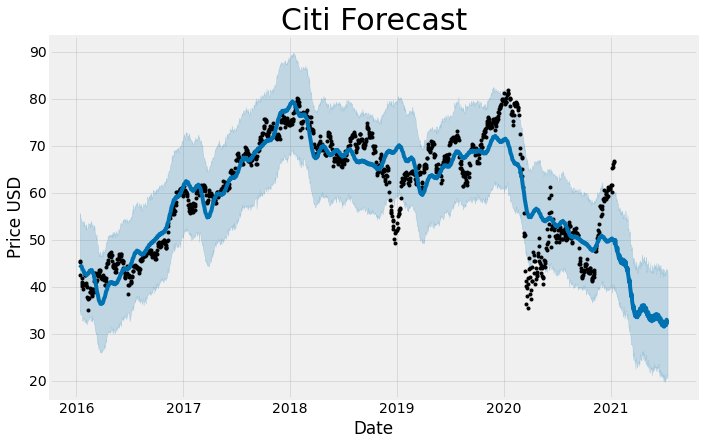

In [49]:
c_df = C['Close'].to_frame()
c_df.reset_index(level=0, inplace=True)
c_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

c_model = Prophet(interval_width = 0.95, daily_seasonality=True)
c_model.fit(c_df)

c_forecast = c_model.make_future_dataframe(periods = 183)
c_forecast = c_model.predict(c_forecast)

c_model.plot(c_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Citi Forecast', fontsize=30)

Text(0.5, 1.0, 'Green Dot Forecast')

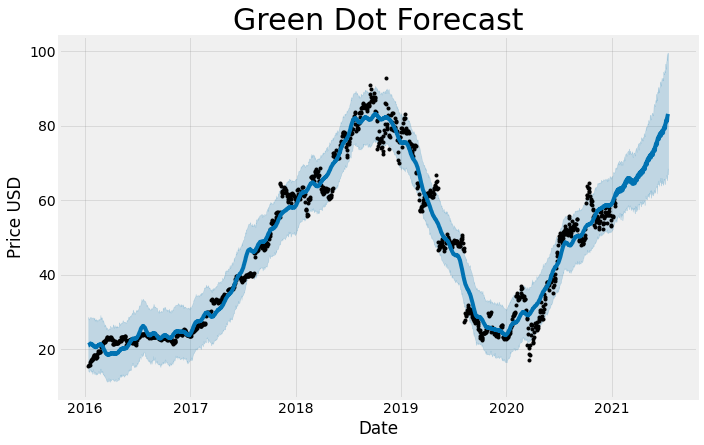

In [50]:
gdot_df = GDOT['Close'].to_frame()
gdot_df.reset_index(level=0, inplace=True)
gdot_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

gdot_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gdot_model.fit(gdot_df)

gdot_forecast = gdot_model.make_future_dataframe(periods = 183)
gdot_forecast = gdot_model.predict(gdot_forecast)

gdot_model.plot(gdot_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Green Dot Forecast', fontsize=30)

Text(0.5, 1.0, 'Paypal Forecast')

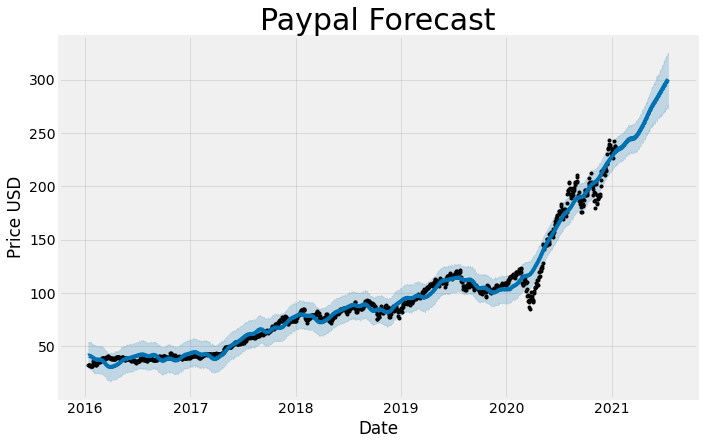

In [51]:
pypl_df = PYPL['Close'].to_frame()
pypl_df.reset_index(level=0, inplace=True)
pypl_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

pypl_model = Prophet(interval_width = 0.95, daily_seasonality=True)
pypl_model.fit(pypl_df)

pypl_forecast = pypl_model.make_future_dataframe(periods = 183)
pypl_forecast = pypl_model.predict(pypl_forecast)

pypl_model.plot(pypl_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Paypal Forecast', fontsize=30)

In [52]:
pypl_forecast.to_excel('pypl_forecast.xlsx')
jpm_forecast.to_excel('jpm_forecast.xlsx')
c_forecast.to_excel('c_forecast.xlsx')
gdot_forecast.to_excel('gdot_forecast.xlsx')
shop_forecast.to_excel('shop_forecast.xlsx')
etsy_forecast.to_excel('etsy_forecast.xlsx')
wix_forecast.to_excel('wix_forecast.xlsx')
gddy_forecast.to_excel('gddy_forecast.xlsx')
kr_forecast.to_excel('kr_forecast.xlsx')
cmg_forecast.to_excel('cmg_forecast.xlsx')
sbux_forecast.to_excel('sbux_forecast.xlsx')
mcd_forecast.to_excel('mcd_forecast.xlsx')
hd_forecast.to_excel('hd_forecast.xlsx')
wmt_forecast.to_excel('wmt_forecast.xlsx')
tgt_forecast.to_excel('tgt_forecast.xlsx')
bby_forecast.to_excel('bby_forecast.xlsx')

In [53]:
pypl_forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-13  33.363924   29.223446   54.366056    33.363924    33.363924   
1 2016-01-14  33.375576   28.980415   53.413485    33.375576    33.375576   
2 2016-01-15  33.387229   29.328874   54.372636    33.387229    33.387229   
3 2016-01-19  33.433839   28.954234   54.315845    33.433839    33.433839   
4 2016-01-20  33.445492   28.365830   53.595428    33.445492    33.445492   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0        8.037467              8.037467              8.037467  5.569762  ...   
1        8.186762              8.186762              8.186762  5.569762  ...   
2        7.917866              7.917866              7.917866  5.569762  ...   
3        7.534641              7.534641              7.534641  5.569762  ...   
4        7.544939              7.544939              7.544939  5.569762  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0  0.323756      0.323756      0.323756  2.143949      2.143949      2.143949   
1  0.495041      0.495041      0.495041  2.121959      2.121959      2.121959   
2  0.263060      0.263060      0.263060  2.085043      2.085043      2.085043   
3  0.192604      0.192604      0.192604  1.772274      1.772274      1.772274   
4  0.323756      0.323756      0.323756  1.651421      1.651421      1.651421   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  41.401391  
1                         0.0  41.562338  
2                         0.0  41.305095  
3                         0.0  40.968480  
4                         0.0  40.990430  

[5 rows x 22 columns]

In [54]:
six_month_growth.head()

SHOP    0.226570
ETSY    0.961844
WIX    -0.071779
GDDY    0.170725
KR     -0.052885
dtype: float64

In [55]:
new = stock_close
full_dates = pd.date_range(start='01/12/2016', end='01/12/2021')

yoy_growth = new.reindex(full_dates)
yoy_growth

yoy_growth['SHOP'] = yoy_growth['SHOP'].fillna(method='ffill')
yoy_growth['SHOP%'] = yoy_growth['SHOP'].pct_change(365)

yoy_growth['ETSY'] = yoy_growth['ETSY'].fillna(method='ffill')
yoy_growth['ETSY%'] = yoy_growth['ETSY'].pct_change(365)

yoy_growth['WIX'] = yoy_growth['WIX'].fillna(method='ffill')
yoy_growth['WIX%'] = yoy_growth['WIX'].pct_change(365)

yoy_growth['GDDY'] = yoy_growth['GDDY'].fillna(method='ffill')
yoy_growth['GDDY%'] = yoy_growth['GDDY'].pct_change(365)

yoy_growth['KR'] = yoy_growth['KR'].fillna(method='ffill')
yoy_growth['KR%'] = yoy_growth['KR'].pct_change(365)

yoy_growth['MCD'] = yoy_growth['MCD'].fillna(method='ffill')
yoy_growth['MCD%'] = yoy_growth['MCD'].pct_change(365)

yoy_growth['CMG'] = yoy_growth['CMG'].fillna(method='ffill')
yoy_growth['CMG%'] = yoy_growth['CMG'].pct_change(365)

yoy_growth['SBUX'] = yoy_growth['SBUX'].fillna(method='ffill')
yoy_growth['SBUX%'] = yoy_growth['SBUX'].pct_change(365)

yoy_growth['BBY'] = yoy_growth['BBY'].fillna(method='ffill')
yoy_growth['BBY%'] = yoy_growth['BBY'].pct_change(365)

yoy_growth['HD'] = yoy_growth['HD'].fillna(method='ffill')
yoy_growth['HD%'] = yoy_growth['HD'].pct_change(365)

yoy_growth['WMT'] = yoy_growth['WMT'].fillna(method='ffill')
yoy_growth['WMT%'] = yoy_growth['WMT'].pct_change(365)

yoy_growth['TGT'] = yoy_growth['TGT'].fillna(method='ffill')
yoy_growth['TGT%'] = yoy_growth['TGT'].pct_change(365)

yoy_growth['C'] = yoy_growth['C'].fillna(method='ffill')
yoy_growth['C%'] = yoy_growth['C'].pct_change(365)

yoy_growth['JPM'] = yoy_growth['JPM'].fillna(method='ffill')
yoy_growth['JPM%'] = yoy_growth['JPM'].pct_change(365)

yoy_growth['PYPL'] = yoy_growth['PYPL'].fillna(method='ffill')
yoy_growth['PYPL%'] = yoy_growth['PYPL'].pct_change(365)

yoy_growth['GDOT'] = yoy_growth['GDOT'].fillna(method='ffill')
yoy_growth['GDOT%'] = yoy_growth['GDOT'].pct_change(365)

yoy_growth['SP500'] = yoy_growth['SP500'].fillna(method='ffill')
yoy_growth['SP500%'] = yoy_growth['SP500'].pct_change(365)

columns_to_keep = ['SHOP%','ETSY%','WIX%','GDDY%', 'KR%','MCD%','CMG%','SBUX%','BBY%', 'HD%', 'WMT%', 
                   'TGT%', 'C%', 'JPM%', 'PYPL%','GDOT%', 'SP500%']

yoy_growth = yoy_growth[columns_to_keep]
yoy_growth.index.name = 'Date'
yoy_growth.head()
# yoy_growth.to_excel('yoy_growth.xlsx')

SHOP%  ETSY%  WIX%  GDDY%  KR%  MCD%  CMG%  SBUX%  BBY%  HD%  \
Date                                                                       
2016-01-12    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-13    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-14    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-15    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2016-01-16    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   

            WMT%  TGT%  C%  JPM%  PYPL%  GDOT%  SP500%  
Date                                                    
2016-01-12   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-13   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-14   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-15   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2016-01-16   NaN   NaN NaN   NaN    NaN    NaN     NaN